# **Capstone project: Providing data-driven suggestions for HR**

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

-  Who are your stakeholders for this project?
    * Salifort Motors
- What are you trying to solve or accomplish?
    * Predict employees likely to quit
- What are your initial observations when you explore the data?
    * I would use "left" as my target variable
    * I think the predictors that might have the greatest signal is: employee salary, whether or not the employee was promoted in the last 5 years, How long the employee has been with the company.
    * 83% stayed with the company, 16% left the company
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
    * sklearn and pandas documentation
    * strategies for outliers and which models are robust against outliers
- Do you have any ethical considerations in this stage?
    * I might want to change the objective of the modeling to predicting user churn, it sounds more professional and less antagonistic.




## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [47]:
# Import packages
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import pickle

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, classification_report
from sklearn.tree import plot_tree

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [48]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
print(df0.shape)
df0.head(2)

(14999, 10)


satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   

   salary  
0     low  
1  medium

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [49]:
# Gather basic information about the data
print(f'\ndtypes: \n{df0.dtypes}')
# Department, salary = object
# satisfaction_level, last_evaluation = float
# number_project, average_monthly_hours, time_spend_company, Work_accident, left, promotion_last_5years = int
print(f'\nany missing values? \n{df0.isna().sum()}')
df0.info()


dtypes: 
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

any missing values? 
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project     

### Gather descriptive statistics about the data

In [50]:
# Gather descriptive statistics about the data
df0.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

### Renaming some columns

In [51]:
# Display all column names
df0.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'Department', 'salary'],
      dtype=object)

In [52]:
# Rename columns as needed
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                   'promotion_last_5years': 'promotion',
                   'Department': 'department',
                   'time_spend_company': 'tenure',
                   'number_project': 'num_projects',
                   'average_montly_hours': 'avg_mo_hours'})


# Display all column names after the update
print(df0.columns.values)

['satisfaction_level' 'last_evaluation' 'num_projects' 'avg_mo_hours'
 'tenure' 'work_accident' 'left' 'promotion' 'department' 'salary']


### Check missing values

In [53]:
# Check for missing values
df0.isna().sum().sum()


0

### Check duplicates

In [54]:
# Check for duplicates
df0.duplicated().sum()


3008

In [55]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

satisfaction_level  last_evaluation  num_projects  avg_mo_hours  tenure  \
396                 0.46             0.57             2           139       3   
866                 0.41             0.46             2           128       3   
1317                0.37             0.51             2           127       3   
1368                0.41             0.52             2           132       3   
1461                0.42             0.53             2           142       3   

      work_accident  left  promotion  department  salary  
396               0     1          0       sales     low  
866               0     1          0  accounting     low  
1317              0     1          0       sales  medium  
1368              0     1          0       RandD     low  
1461              0     1          0       sales     low

In [56]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')
# Display first few rows of new dataframe as needed
df1.head(2)

satisfaction_level  last_evaluation  num_projects  avg_mo_hours  tenure  \
0                0.38             0.53             2           157       3   
1                0.80             0.86             5           262       6   

   work_accident  left  promotion department  salary  
0              0     1          0      sales     low  
1              0     1          0      sales  medium

### Check outliers

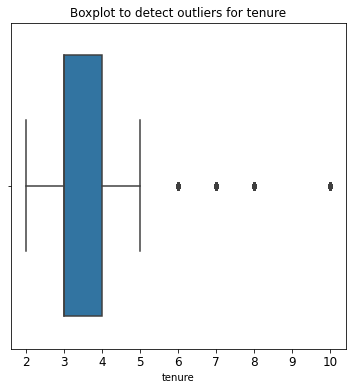

In [57]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers

plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

In [58]:
# Determine the number of rows containing outliers

percentile25 = df1['tenure'].quantile(0.25)
percentile75 = df1['tenure'].quantile(0.75)
iqr = percentile75 - percentile25
print(f'iqr: {iqr}')
      
upper_limit = percentile75 + (1.5*iqr)
lower_limit = percentile25 - (1.5*iqr)
print(f'upper_limit: {upper_limit}')
print(f'lower_limit: {lower_limit}')
      
over_upper = df1['tenure'] > upper_limit
under_lower = df1['tenure'] < lower_limit

within_upper = df1['tenure'] <= upper_limit
within_lower = df1['tenure'] >= lower_limit

# Identify subset of data containing outliers in `tenure`
outliers = df1[over_upper | under_lower]
print(outliers.shape)
      
df2 = df1[within_upper & within_lower]
print(df1.shape)
print(df2.shape)
# df2.head(3)



iqr: 1.0
upper_limit: 5.5
lower_limit: 1.5
(824, 10)
(11991, 10)
(11167, 10)


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage

💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
    * they are non-linear
    * with a transformation, quadractic relationships were revealed.  Perhaps polynomial regression or logistic regression/decision trees as a classification task might be better to fit the data.
- What do you observe about the distributions in the data?
    * distributions are not normal.  I see a little bit of left skewed and right skewed.
    * for example num_projects is right skewed
    * satisfaction and last evaluation are left skewed
- What transformations did you make with your data? Why did you chose to make those decisions?
    * I tried np.log1p (because it's always a good idea to first log transform to find linear relationships).
    * I noticed I had right-skewed data so I tried the following: log, sqrt, Box-Cox, or reciprocal.
    * I noticed I had left-skewed data so I tried the following: exp, square, or cuberoot.
    * I noticed I could potentially have non-linear relationships, so I Tried: Try QuantileTransformer or Yeo-Johnson.
    * The non-linear relationship was probably the most promising if I'm insisting that I use a regressor to fit the data.
- What are some purposes of EDA before constructing a predictive model?
    * Find missing data, gaps, and outliers in order to handle them appropriately
    * Uncover correlations and relationships that have the most predictive signal
    * Understand the center of our data
    * Understand the imbalance in our data (this will affect generalization later as we estimate population parameters)
    * Understand where we might need to encode the data
        - Sometimes it's appropriate to dummy encode or one hot encode categorical variables
        - Other times, for instance if it's ordinal or ranks, it's appropriate to cat encode (aka label encode).
    * Understand where we might want to feature engineer or transform data so it meets model assumptions
    * Understand the distributions of our independent variables so we can best model it and apply the right technique to it to predict on the population
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [59]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())

# Get percentages of people who left vs. stayed
df1['left'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

0    10000
1     1991
Name: left, dtype: int64


0    83.4%
1    16.6%
Name: left, dtype: object

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

['satisfaction_level' 'last_evaluation' 'num_projects' 'avg_mo_hours'
 'tenure' 'work_accident' 'left' 'promotion' 'department' 'salary']


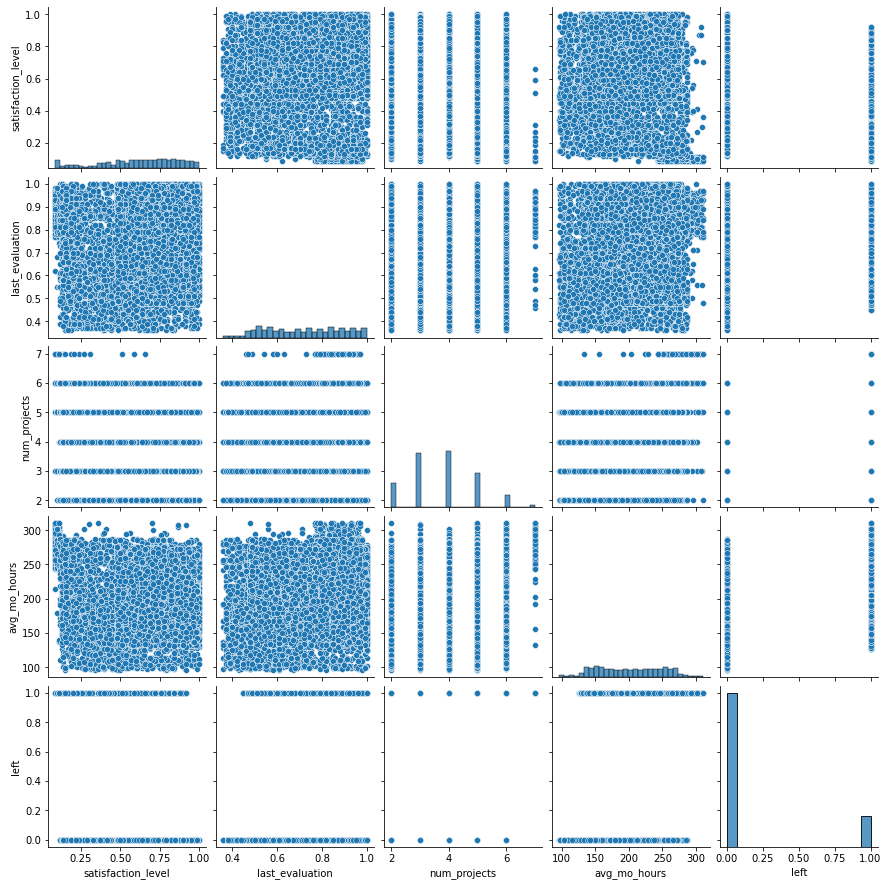

In [60]:
# Create a plot as needed
print(df1.columns.values)
# pairplot showed nothing
sns.pairplot(df1[['satisfaction_level','last_evaluation','num_projects','avg_mo_hours', 'left']])
plt.show()
# satisfaction_level and last_evaluation slightly left-skewed
# num_projects slightly right skewed
# avg_mo_hours bimodal (right and left skewed, uniform in the middle)

['satisfaction_level' 'last_evaluation' 'num_projects' 'avg_mo_hours'
 'tenure' 'work_accident' 'left' 'promotion' 'department' 'salary'
 'log_last_evaluation' 'log_avg_mo_hours' 'log_satisfaction_level']


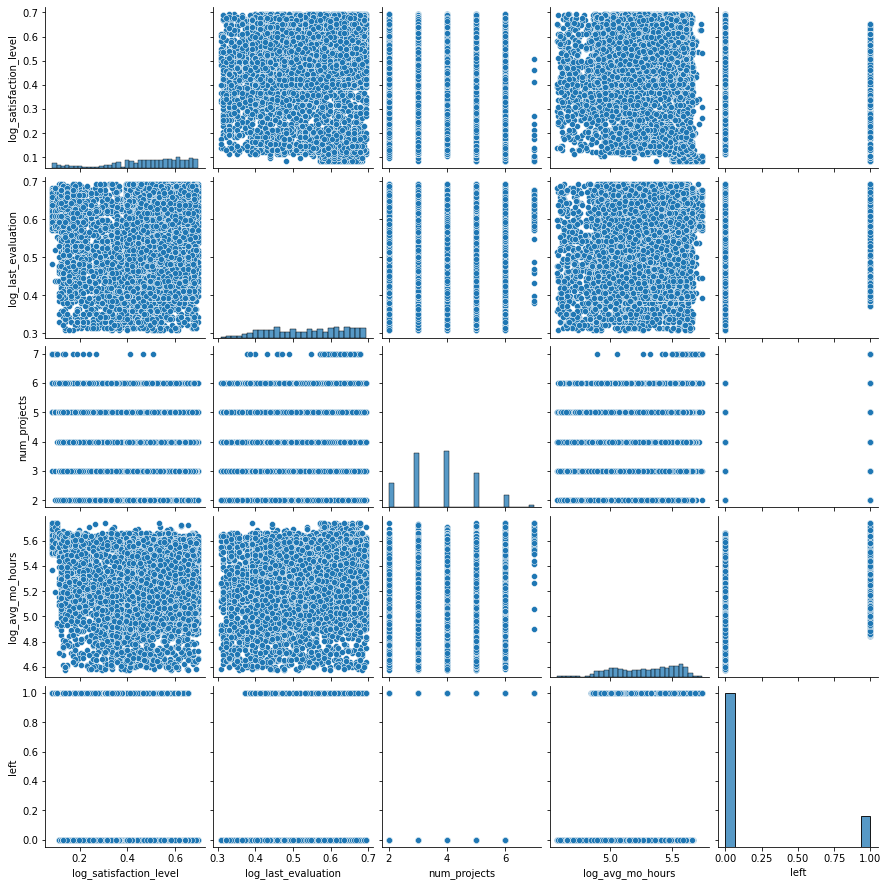

In [61]:
# check if log transform reveals any linear relationship
df_transform = df1.copy()
df_transform['log_last_evaluation'] = np.log1p(df_transform['last_evaluation'])  # log(1 + x) to handle 0 values
df_transform['log_avg_mo_hours'] = np.log1p(df_transform['avg_mo_hours'])  # log(1 + x)
df_transform['log_satisfaction_level'] = np.log1p(df_transform['satisfaction_level'])  # log(1 + x)
print(df_transform.columns.values)
sns.pairplot(df_transform[['log_satisfaction_level','log_last_evaluation','num_projects','log_avg_mo_hours', 'left']])
plt.show()

In [62]:
from sklearn.preprocessing import QuantileTransformer
import seaborn as sns


df_transformed = df1.copy()
qt = QuantileTransformer(output_distribution='normal', random_state=42)  # Change 'normal' to 'uniform' if needed
columns_to_transform = ['last_evaluation', 'avg_mo_hours', 'satisfaction_level']
df_transformed[columns_to_transform] = qt.fit_transform(df1[columns_to_transform])
df_transformed = df_transformed.rename(columns={
    'last_evaluation': 'qt_last_evaluation',
    'avg_mo_hours': 'qt_avg_mo_hours',
    'satisfaction_level': 'qt_satisfaction_level'
})

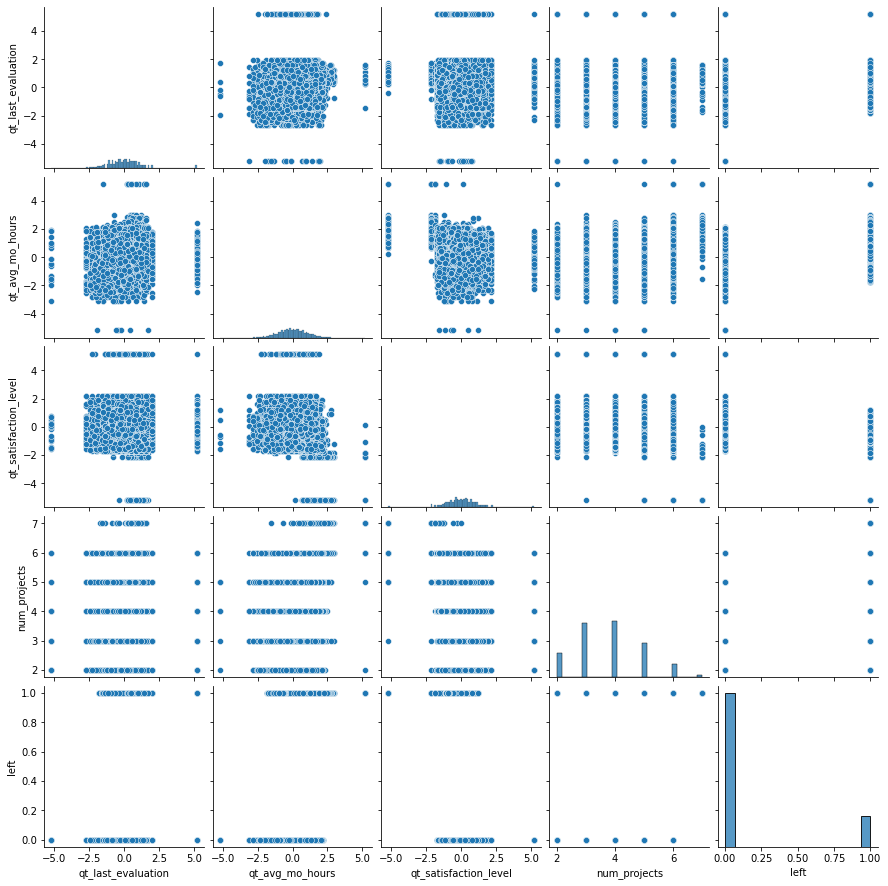

In [63]:
sns.pairplot(df_transformed[['qt_last_evaluation', 'qt_avg_mo_hours', 'qt_satisfaction_level', 'num_projects', 'left']])
plt.show()

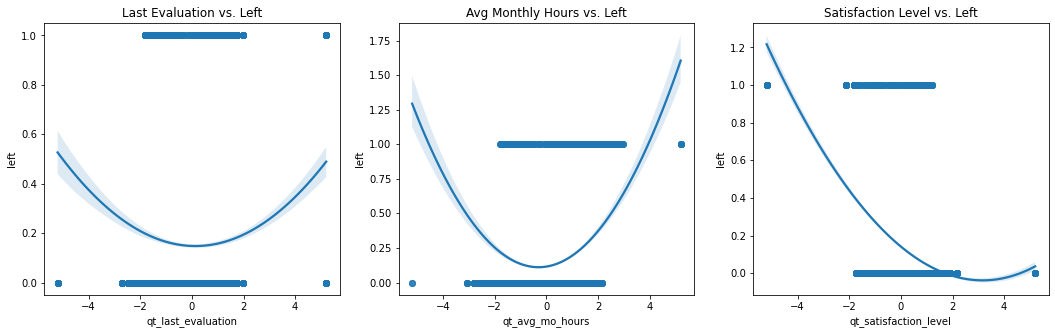

In [64]:
# use regplot for quantiles
# there is definitely a quadractic, non-linear relationship between the independent variables and the target variables.

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.regplot(x=df_transformed['qt_last_evaluation'], y=df1['left'], order=2, scatter_kws={'alpha':0.3}, ax=axes[0])
sns.regplot(x=df_transformed['qt_avg_mo_hours'], y=df1['left'], order=2, scatter_kws={'alpha':0.3}, ax=axes[1])
sns.regplot(x=df_transformed['qt_satisfaction_level'], y=df1['left'], order=2, scatter_kws={'alpha':0.3}, ax=axes[2])

axes[0].set_title('Last Evaluation vs. Left')
axes[1].set_title('Avg Monthly Hours vs. Left')
axes[2].set_title('Satisfaction Level vs. Left')

plt.show()

# Transformation Helpers

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

def transform_and_pairplot(df, columns, transformations, target_variable):
    """
    Apply specified transformations to given columns in a dataframe and visualize them with pair plots.
    
    Parameters:
    df (pd.DataFrame): The input dataframe.
    columns (list): List of column names to transform.
    transformations (list): List of transformations to apply. 
                           Supported: 'log', 'boxcox', 'reciprocal', 'sqrt', 'exp', 'square', 'cuberoot', 'quantile', 'yeo-johnson', 'log-normal'
    target_variable (str): The name of the target variable column to include in the pair plot.
    
    Returns:
    None (displays seaborn pairplots)
    """
    
    # Create a copy to avoid modifying the original dataframe
    df_transformed = df.copy()
    
    transformation_funcs = {
        'log': lambda x: np.log1p(x),  # log(1 + x) to handle 0 values
        'boxcox': lambda x: boxcox(x + 1e-5)[0],  # Ensure strictly positive
        'reciprocal': lambda x: 1 / (x + 1e-5),  # Avoid division by zero
        'sqrt': np.sqrt,
        'exp': np.exp,
        'square': lambda x: x ** 2,
        'cuberoot': np.cbrt,
        'quantile': lambda x: QuantileTransformer(output_distribution='normal', random_state=42).fit_transform(x.values.reshape(-1, 1)).flatten(),
        'yeo-johnson': lambda x: PowerTransformer(method='yeo-johnson').fit_transform(x.values.reshape(-1, 1)).flatten(),
        'log-normal': lambda x: np.exp(PowerTransformer(method='yeo-johnson').fit_transform(x.values.reshape(-1, 1))).flatten()
    }
    
    for transform in transformations:
        if transform not in transformation_funcs:
            raise ValueError(f"Unsupported transformation: {transform}")
        
        temp_df = df.copy()
        
        for col in columns:
            temp_df[col] = df[col]
            temp_df[f'{transform}_{col}'] = transformation_funcs[transform](temp_df[col])
        
        # Select transformed columns and add the target variable for comparison
        selected_columns = [col for col in columns] + [f'{transform}_{col}' for col in columns] + [target_variable]
        
        # Create pairplot
        sns.pairplot(temp_df[selected_columns])
        plt.suptitle(f'Pairplot for {transform} transformation', y=1.02)
        plt.show()

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox, gaussian_kde
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from scipy.stats import kurtosis, skew

def transform_and_pairplot_detect_bimodal(df, columns, transformations, target_variable):
    """
    Apply specified transformations to given columns in a dataframe and visualize them with pair plots.
    If a column is detected as bimodal, a Quantile Transformer is applied automatically.
    
    Parameters:
    df (pd.DataFrame): The input dataframe.
    columns (list): List of column names to transform.
    transformations (list): List of transformations to apply. 
                           Supported: 'log', 'boxcox', 'reciprocal', 'sqrt', 'exp', 'square', 'cuberoot', 'quantile', 'yeo-johnson', 'log-normal'
    target_variable (str): The name of the target variable column to include in the pair plot.
    
    Returns:
    None (displays seaborn pairplots)
    """
    
    def detect_bimodal(data):
        """Detects if a distribution is bimodal using kernel density estimation (KDE)."""
        kde = gaussian_kde(data.dropna())
        x_grid = np.linspace(min(data), max(data), 1000)
        density = kde(x_grid)
        peaks = np.where((density[1:-1] > density[:-2]) & (density[1:-1] > density[2:]))[0]
        return len(peaks) > 1  # True if more than one peak is found

        # Create a copy to avoid modifying the original dataframe
        df_transformed = df.copy()
    
    transformation_funcs = {
        # Right-skewed transformations (Used to normalize right-skewed data)
        'log': lambda x: np.log1p(x),  # log(1 + x) to handle 0 values
        'boxcox': lambda x: boxcox(x + 1e-5)[0],  # Ensure strictly positive
        'reciprocal': lambda x: 1 / (x + 1e-5),  # Avoid division by zero
        
        # Left-skewed transformations (Used to normalize left-skewed data)
        'sqrt': np.sqrt,
        'exp': np.exp,
        'square': lambda x: x ** 2,
        'cuberoot': np.cbrt,
        
        # Non-linear transformations (Used to handle non-normal distributions)
        'quantile': lambda x: QuantileTransformer(output_distribution='normal', random_state=42).fit_transform(x.values.reshape(-1, 1)).flatten(),
        'yeo-johnson': lambda x: PowerTransformer(method='yeo-johnson').fit_transform(x.values.reshape(-1, 1)).flatten(),
        'log-normal': lambda x: np.exp(PowerTransformer(method='yeo-johnson').fit_transform(x.values.reshape(-1, 1))).flatten()
    }
    
    for transform in transformations:
        if transform not in transformation_funcs:
            raise ValueError(f"Unsupported transformation: {transform}")
        
        temp_df = df.copy()
        
        for col in columns:
            if detect_bimodal(temp_df[col]):
                print(f"{col} detected as bimodal. Applying Quantile Transformer instead of {transform}.")
                # not this is in essence overwriting transform in what would normally be called [f'{transform}_{col}']
                temp_df[f'quantile_{col}'] = transformation_funcs['quantile'](temp_df[col])
            else:
                temp_df[f'{transform}_{col}'] = transformation_funcs[transform](temp_df[col])
        
        # Select transformed columns and add the target variable for comparison
        orig_cols = [col for col in columns]
        transformed_cols = [
            f'{transform}_{col}' if f'{transform}_{col}' in temp_df else f'quantile_{col}' for col in columns
        ]
        selected_columns = orig_cols + transformed_cols + [target_variable]
        
        # Create pairplot
        sns.pairplot(temp_df[selected_columns])
        plt.suptitle(f'Pairplot for {transform} transformation', y=1.02)
        plt.show()

In [67]:
# satisfaction_level and last_evaluation slightly left-skewed
# num_projects slightly right skewed
# avg_mo_hours bimodal (right and left skewed, uniform in the middle)

# Right Skewed

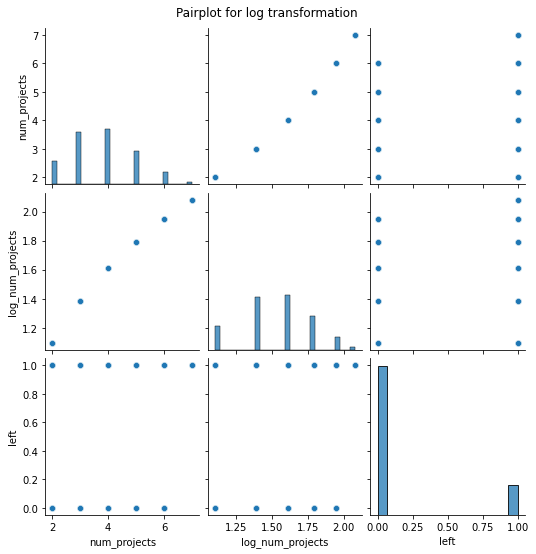

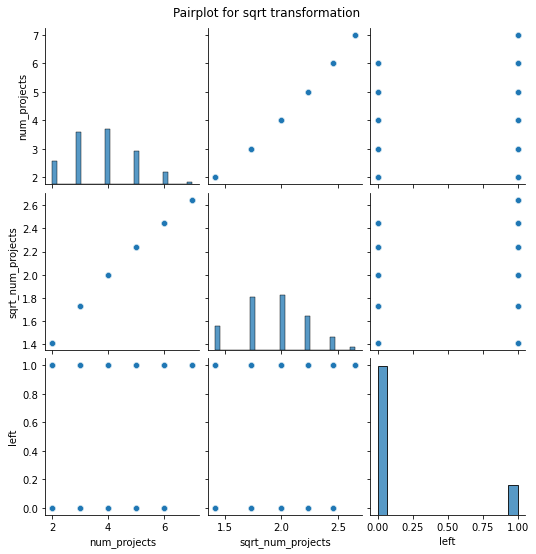

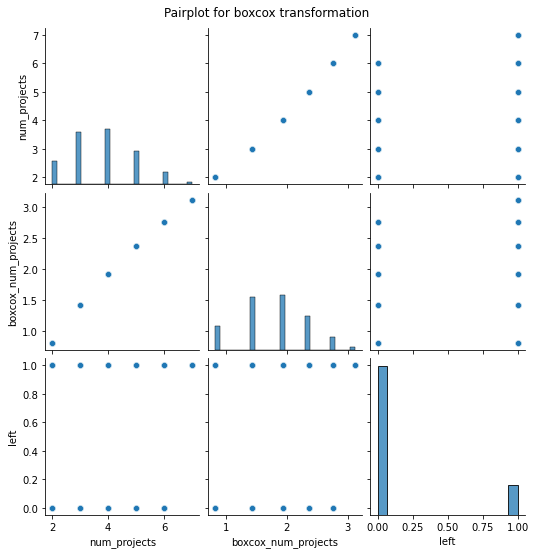

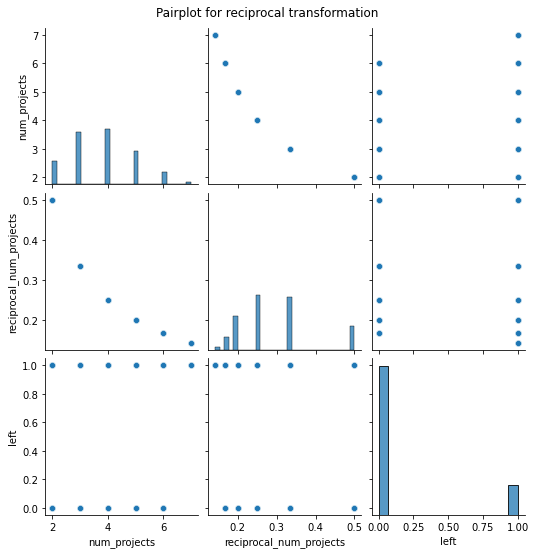

In [68]:

transform_and_pairplot(df1, ['num_projects'], ['log', 'sqrt', 'boxcox', 'reciprocal'], 'left')


# Left Skewed

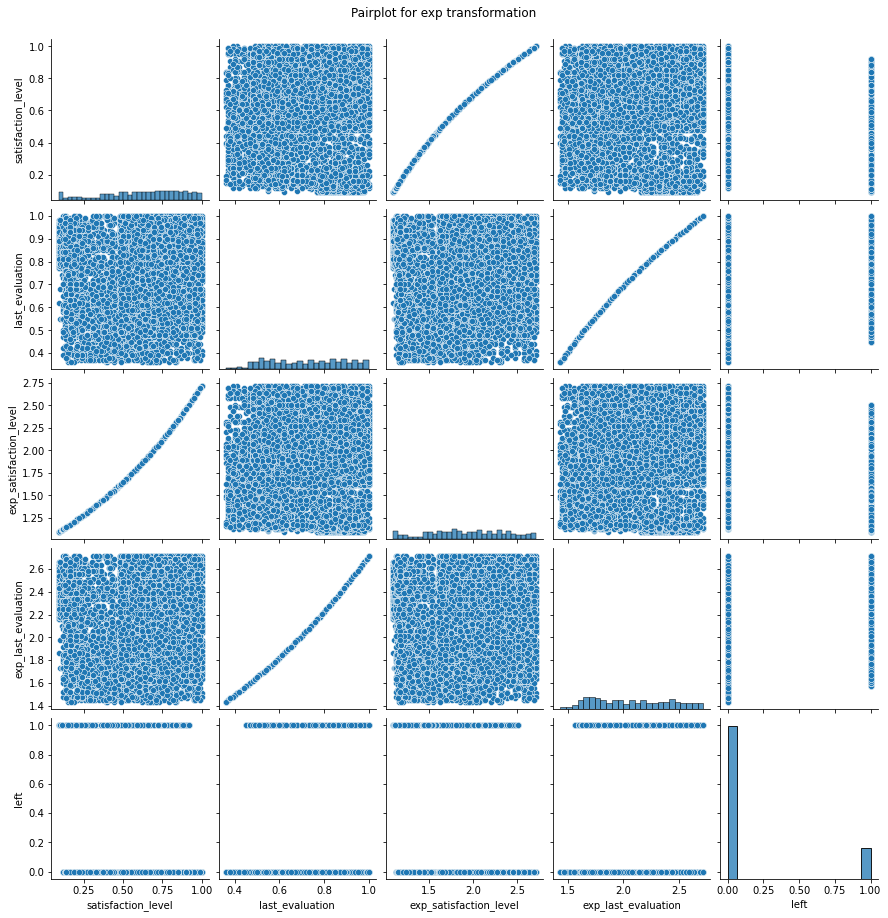

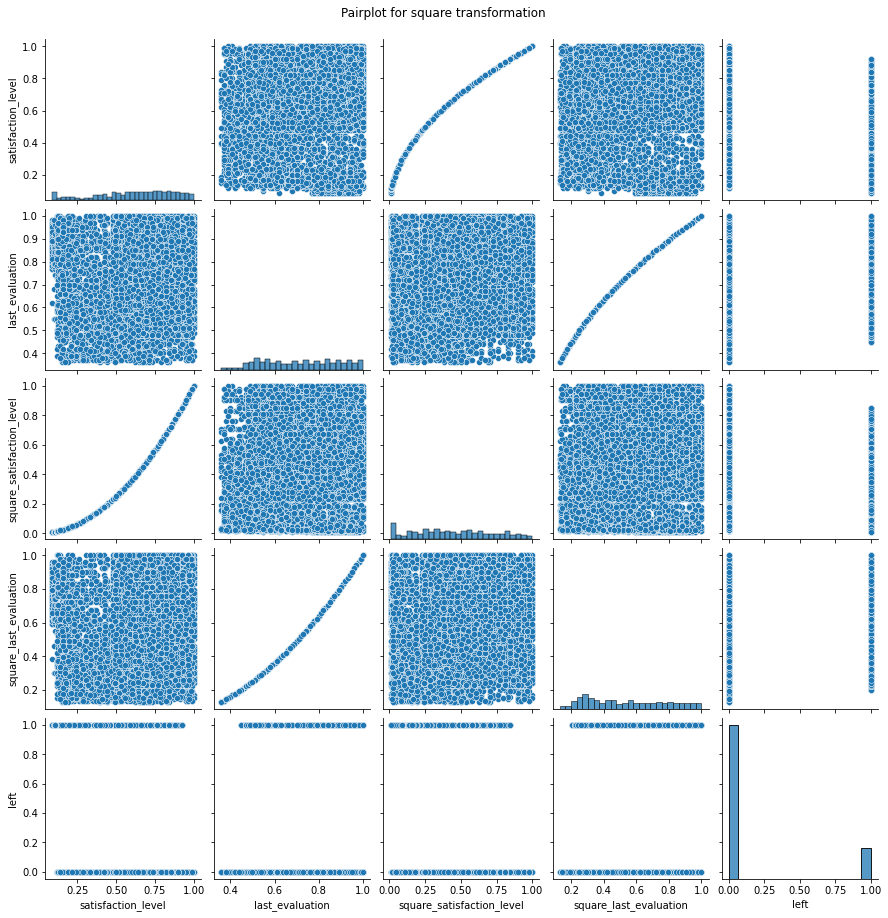

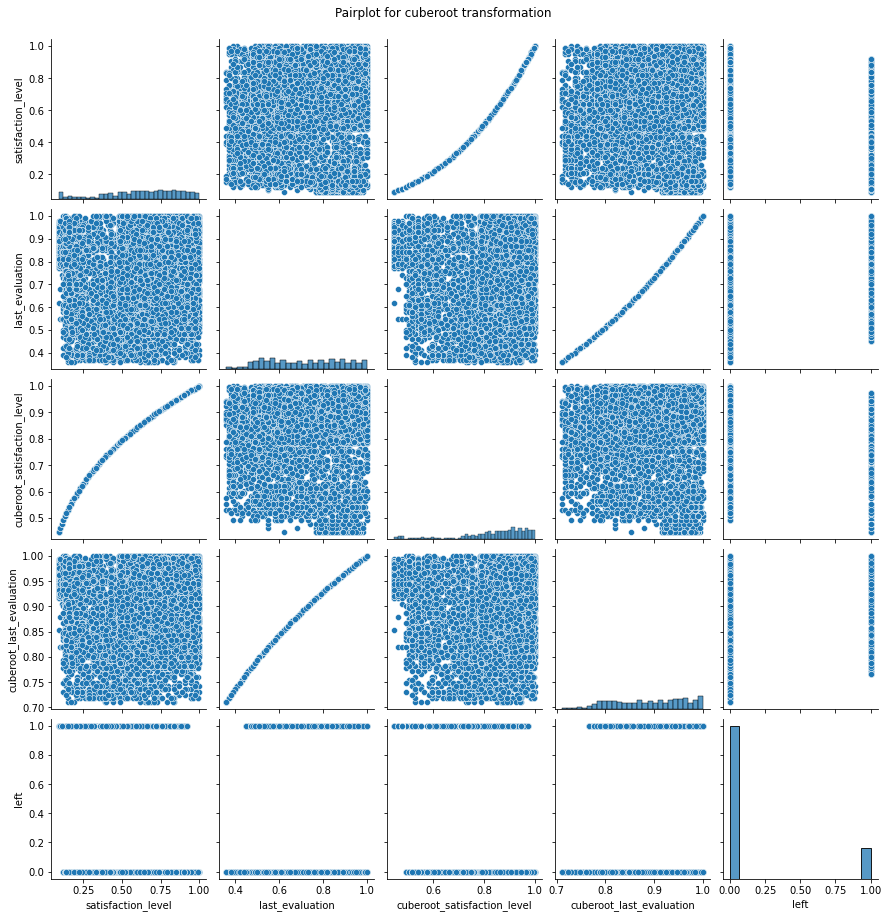

In [69]:

transform_and_pairplot(df1, ['satisfaction_level', 'last_evaluation'], ['exp', 'square', 'cuberoot'], 'left')


# Non-linear

avg_mo_hours detected as bimodal. Applying Quantile Transformer instead of yeo-johnson.


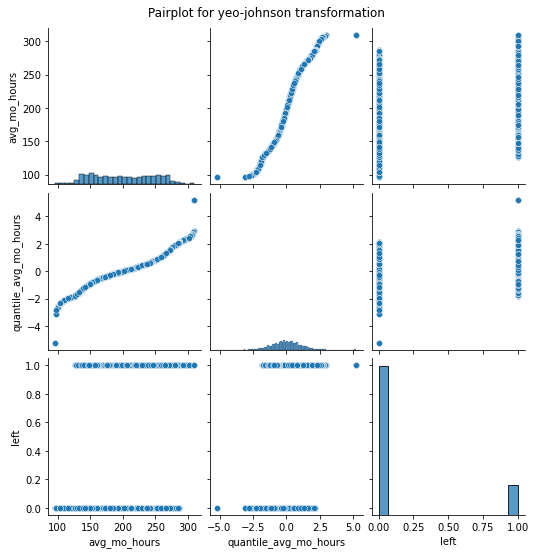

In [70]:

transform_and_pairplot_detect_bimodal(df1, ['avg_mo_hours'], ['yeo-johnson'], 'left')


# Plot log-odds

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def compute_log_odds(df, predictor, target, bins=10):
    """
    Computes log-odds for a binned predictor variable.
    
    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    predictor (str): The name of the predictor variable.
    target (str): The binary target variable.
    bins (int): Number of bins to group the predictor into.
    
    Returns:
    pd.DataFrame: A dataframe with binned predictor values and log-odds.
    """
    df = df.copy()
    
    # Bin the predictor variable into quantiles or fixed bins
    df['binned'] = pd.qcut(df[predictor], q=bins, duplicates='drop')

    # Compute log-odds
    log_odds_df = df.groupby('binned')[target].agg(['mean', 'count'])
    log_odds_df['log_odds'] = np.log(log_odds_df['mean'] / (1 - log_odds_df['mean']))
    
    # Replace bin labels with the midpoint of each bin for plotting
    log_odds_df['bin_midpoint'] = df.groupby('binned')[predictor].mean().values
    
    return log_odds_df.reset_index()

def plot_log_odds(df, predictor, target, bins=10):
    """
    Plots predictor values against log-odds of the target.
    
    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    predictor (str): The name of the predictor variable.
    target (str): The binary target variable.
    bins (int): Number of bins.
    
    Returns:
    None
    """
    log_odds_df = compute_log_odds(df, predictor, target, bins)
    
    plt.figure(figsize=(8,5))
    sns.regplot(x=log_odds_df['bin_midpoint'], y=log_odds_df['log_odds'], order=2, scatter_kws={'s':50})
    plt.xlabel(predictor)
    plt.ylabel("Log-Odds of " + target)
    plt.title(f"Log-Odds Relationship: {predictor} vs {target}")
    plt.show()

# Example usage:
# plot_log_odds(df1, 'avg_mo_hours', 'left', bins=10)


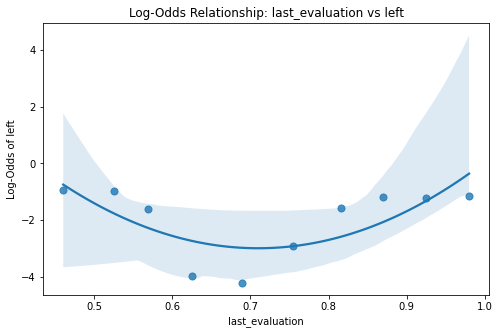

In [72]:
plot_log_odds(df1, 'last_evaluation', 'left', bins=10)

In [73]:
df11 = df1.copy()
df11['avg_mo_hours_squared'] = df11['avg_mo_hours'] ** 2
df11['last_evaluation_squared'] = df11['last_evaluation'] ** 2

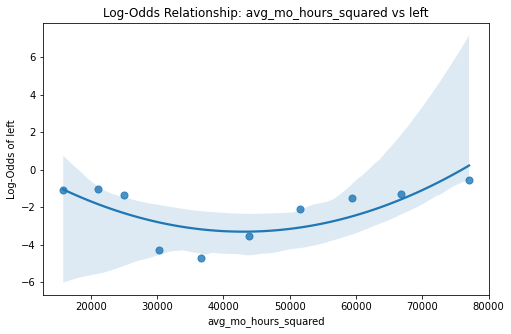

In [74]:
plot_log_odds(df11, 'avg_mo_hours_squared', 'left', bins=10)

['satisfaction_level' 'last_evaluation' 'num_projects' 'avg_mo_hours'
 'tenure' 'work_accident' 'left' 'promotion' 'department' 'salary']


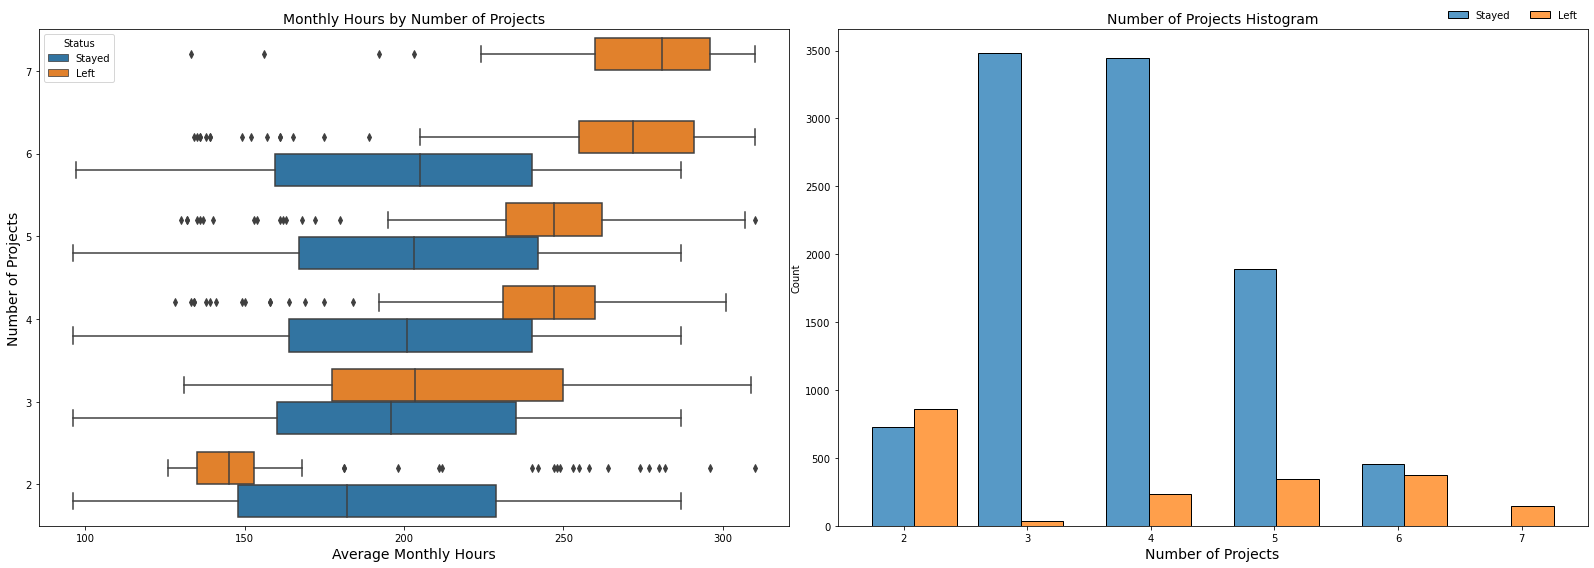

In [75]:
# Create a plot as needed
print(df1.columns.values)

# do a stacked boxplot and histogram between interesting variables with a left hue
hue_labels = {0: "Stayed", 1: "Left"}

# stacked boxplot of avg_mo_hours worked per num_projects, comparing employees who stayed vs. who left
fig, ax = plt.subplots(1, 2, figsize=(26,8))

sns.boxplot(data=df1, x='avg_mo_hours', y='num_projects', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_xlabel('Average Monthly Hours', fontsize=14)
ax[0].set_ylabel('Number of Projects', fontsize=14)
ax[0].set_title('Monthly Hours by Number of Projects', fontsize=14)
# Get legend for boxplot
box_handles, box_labels = ax[0].get_legend_handles_labels()
box_labels = [hue_labels[int(label)] for label in box_labels]  # Map 0/1 to 'Stayed' and 'Left'
ax[0].legend(box_handles, box_labels, title='Status', loc='upper left', bbox_to_anchor=(0, 1))


sns.histplot(data=df1, x='num_projects', hue='left', multiple='dodge', shrink=4, ax=ax[1], legend=True)
ax[1].set_title('Number of Projects Histogram', fontsize=14)
ax[1].set_xlabel('Number of Projects', fontsize=14)
# Get legend for histogram
sns.move_legend(
    ax[1], "lower center",
    bbox_to_anchor=(0.9, 1), ncol=2, title=None, frameon=False,
)
# Get the legend object for histogram
legend = ax[1].get_legend()
# Modify the labels
new_labels = ['Stayed', 'Left']
for text, label in zip(legend.texts, new_labels):
    text.set_text(label)

plt.tight_layout()
plt.subplots_adjust(right=0.85)
plt.show()

- the interquartile range of all employees that had 6-7 projects and worked on average 255 - 295 hours all left.  According to chatGPT, an acceptable range of working hours is: 165–181 hours/month, this includes -+ 8 hours of OT.  This was way over.
- On average, the majority of people that stayed, had 5 or fewer projects.
- Interestingly enough, the most people that left had 2 or fewer projects assigned.
- The employees that had 3 projects that left or stayed proportionally worked the same number of hours.
- Very high number of projects and very low number of projects is correlated with people who left.
- very low/very high projects and very low/high working hours correlated with employees that left.

In [76]:
df_subset=df1[df1['num_projects'] == 3]
df_subset['left'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

0    98.92%
1     1.08%
Name: left, dtype: object

In [77]:
df_subset=df1[df1['num_projects'] == 4]
df_subset['left'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

0    93.57%
1     6.43%
Name: left, dtype: object

In [78]:
# confirm employees with 6 and 7 projects
mask = df1['num_projects']==7
df1[mask]['left'].value_counts() # this confirms all employees with 7 project left, there is no 0 label in value_counts()

1    145
Name: left, dtype: int64

In [79]:
# create helper function for boxplots and histplots with 2 vars and a hue
def create_boxplot_and_histplot(df, box_x, box_y, hist_x, hue, 
                                box_xlabel=None, box_ylabel=None, box_title=None, 
                                hist_xlabel=None, hist_title=None, 
                                legend_labels=None, legend_title=None, 
                                box_orient='h', hist_shrink=2, hist_adjust=0.85, legend_loc='upper_left', multiple_choice='dodge'):
    
    fig, ax = plt.subplots(1, 2, figsize=(26, 8))

    # Boxplot
    sns.boxplot(data=df, x=box_x, y=box_y, hue=hue, orient=box_orient, ax=ax[0])
    ax[0].set_xlabel(box_xlabel if box_xlabel else box_x, fontsize=14)
    ax[0].set_ylabel(box_ylabel if box_ylabel else box_y, fontsize=14)
    ax[0].set_title(box_title if box_title else f'{box_x} by {box_y}', fontsize=14)
    ax[0].invert_yaxis() if box_orient == 'h' else None

    # Update legend labels for boxplot
    if legend_labels:
        handles, labels = ax[0].get_legend_handles_labels()
        ax[0].legend(handles, [legend_labels[int(label)] for label in labels], title=legend_title, loc=legend_loc)

    # Histogram
    sns.histplot(data=df, x=hist_x, hue=hue, multiple=multiple_choice, shrink=hist_shrink, ax=ax[1])
    ax[1].set_xlabel(hist_xlabel if hist_xlabel else hist_x, fontsize=14)
    ax[1].set_title(hist_title if hist_title else f'{hist_x} Histogram', fontsize=14)

    # Get legend for histogram
    sns.move_legend(
        ax[1], "lower center",
        bbox_to_anchor=(0.9, 1), ncol=2, title=None, frameon=False,
    )
    # Get the legend object for histogram
    legend = ax[1].get_legend()
    # Modify the labels
    new_labels = ['Stayed', 'Left']
    for text, label in zip(legend.texts, new_labels):
        text.set_text(label)

    plt.tight_layout()
    plt.subplots_adjust(right=hist_adjust)
    plt.show()

In [80]:
print(df1.columns.values)

['satisfaction_level' 'last_evaluation' 'num_projects' 'avg_mo_hours'
 'tenure' 'work_accident' 'left' 'promotion' 'department' 'salary']


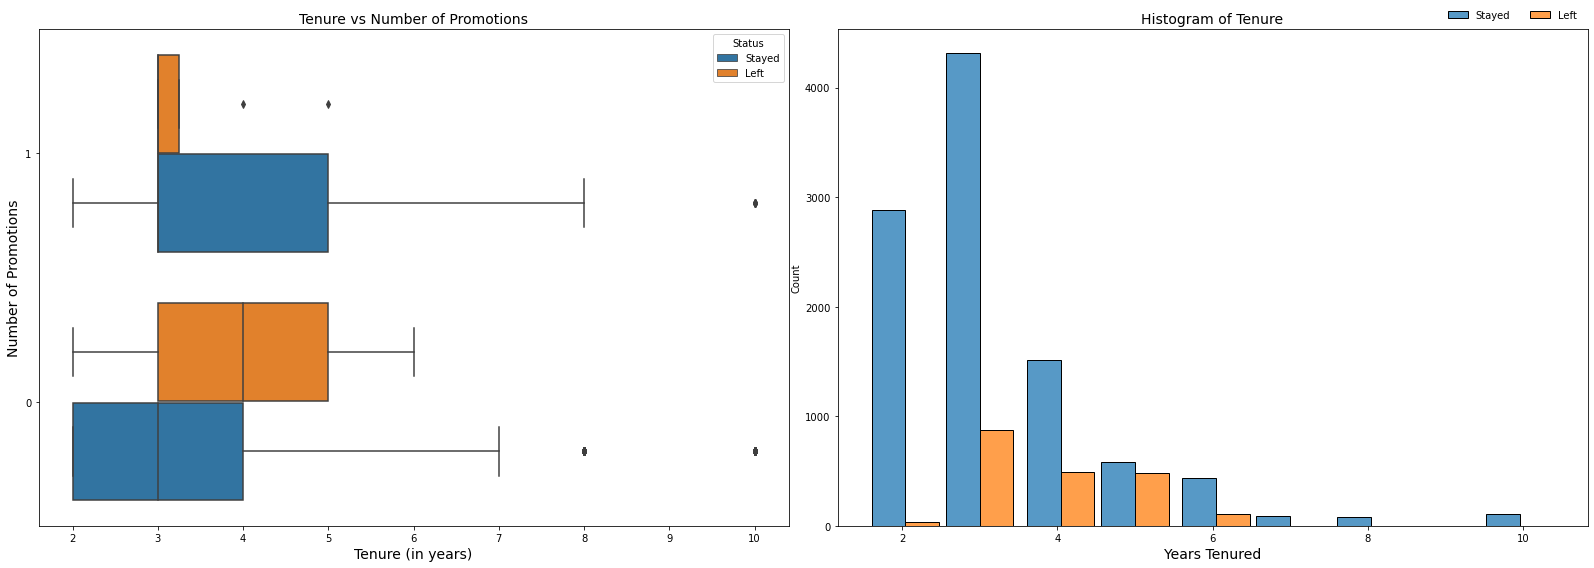

In [81]:
# Create a plot as needed
# promotion and tenure, hue left
hue_mapping = {0: "Stayed", 1: "Left"}
create_boxplot_and_histplot(
    df=df1, 
    box_x='tenure', box_y='promotion',
    box_xlabel='Tenure (in years)', box_ylabel='Number of Promotions',
    box_title='Tenure vs Number of Promotions',
    hue='left',
    hist_x='tenure', 
    hist_xlabel='Years Tenured',
    hist_title='Histogram of Tenure',
    legend_labels=hue_mapping, legend_title='Status',
    hist_shrink=10
)

- Almost all the employees that left having 3-5 years tenure never received a promotion. This sucks.
- Employees with the most tenure received a promotion at some point in their career.
- All employees that left did not tenure greater than 6 years.
- Interpretation: Employees leaving is correlated with not receiving any promotion during their career.

In [82]:
print(df1.columns.values)

['satisfaction_level' 'last_evaluation' 'num_projects' 'avg_mo_hours'
 'tenure' 'work_accident' 'left' 'promotion' 'department' 'salary']


In [83]:
print(df1['work_accident'].unique())

[0 1]


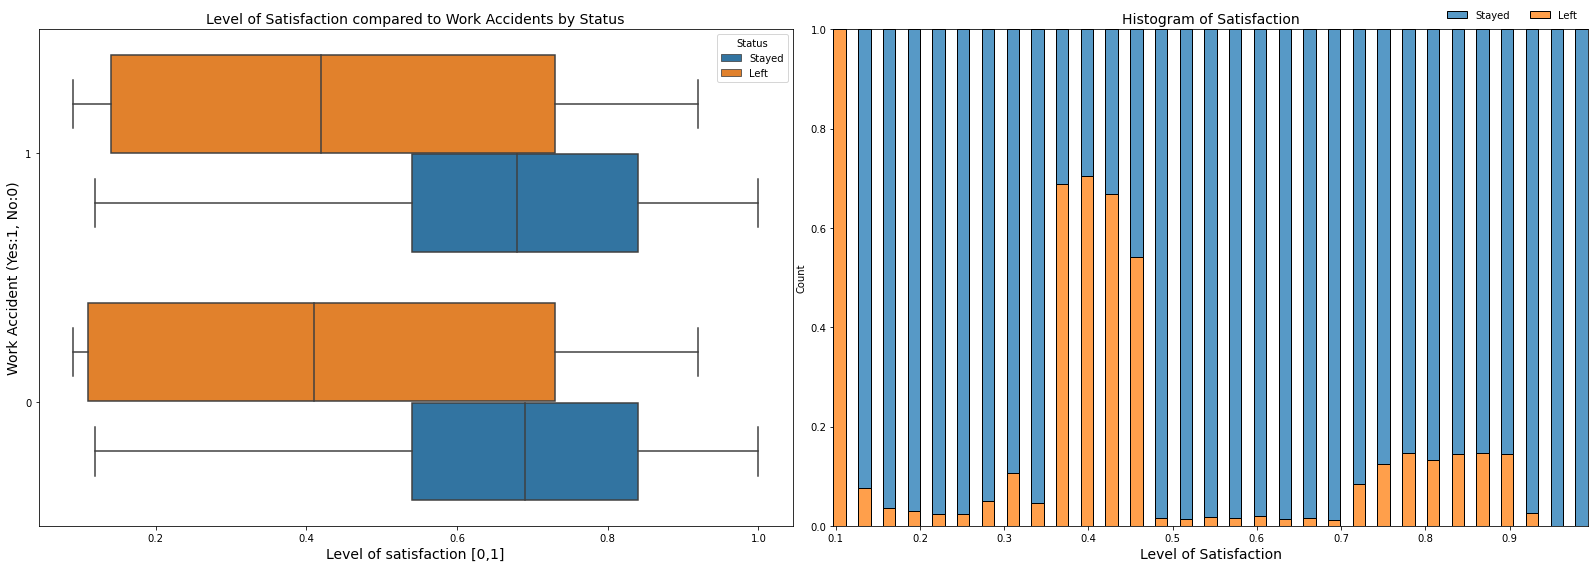

In [84]:
# work accident and satisfaction, hue left
hue_mapping = {0: "Stayed", 1: "Left"}

create_boxplot_and_histplot(
    df=df1, 
    box_x='satisfaction_level', box_y='work_accident',
    box_xlabel='Level of satisfaction [0,1]', box_ylabel='Work Accident (Yes:1, No:0)',
    box_title='Level of Satisfaction compared to Work Accidents by Status',
    hue='left',
    hist_x='satisfaction_level', 
    hist_xlabel='Level of Satisfaction',
    hist_title='Histogram of Satisfaction',
    legend_labels=hue_mapping, legend_title='Status',
    hist_shrink=0.5, multiple_choice='fill'
)

- Employees who remained with the company, regardless of whether they experienced a work accident, reported satisfaction levels ranging between 0.5 and 0.85 in the interquartile range.
- Employees that left, regardless of whether they experienced a work accident, reported dissatisfaction levels ranging between 0 and 0.75 in the interquartile range.
- Most employees that left reported dissatisfaction of 0.4 - 0.49 and then 0.
- There is a group of employees that gave high ratings of satisfaction in the 0.7-0.9 range (most likely left for higher paying positions elsewhere)
- Dissatisfaction is strongly correlated with employee turnover, but it does not appear to be directly influenced by work accidents.

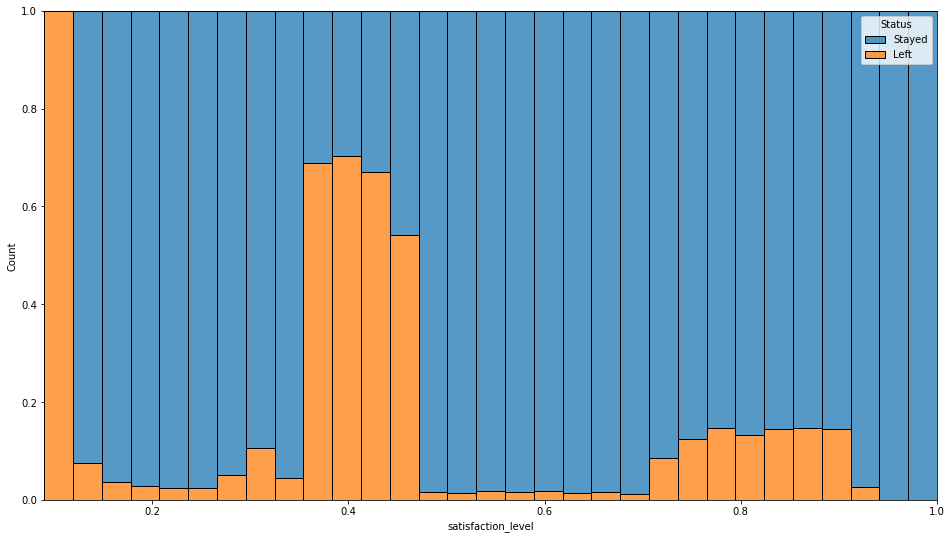

In [85]:
plt.figure(figsize=(16,9))
ax = sns.histplot(data=df1, x='satisfaction_level', hue='left', multiple='fill')
legend = ax.get_legend()
# Modify the labels
new_labels = ['Stayed', 'Left']
for text, label in zip(legend.texts, new_labels):
    text.set_text(label)
sns.move_legend(ax, "upper right", title='Status')
# sns.move_legend(
#         ax, "lower center",
#         bbox_to_anchor=(0.9, 1), ncol=2, title='Status', frameon=False,
#     )

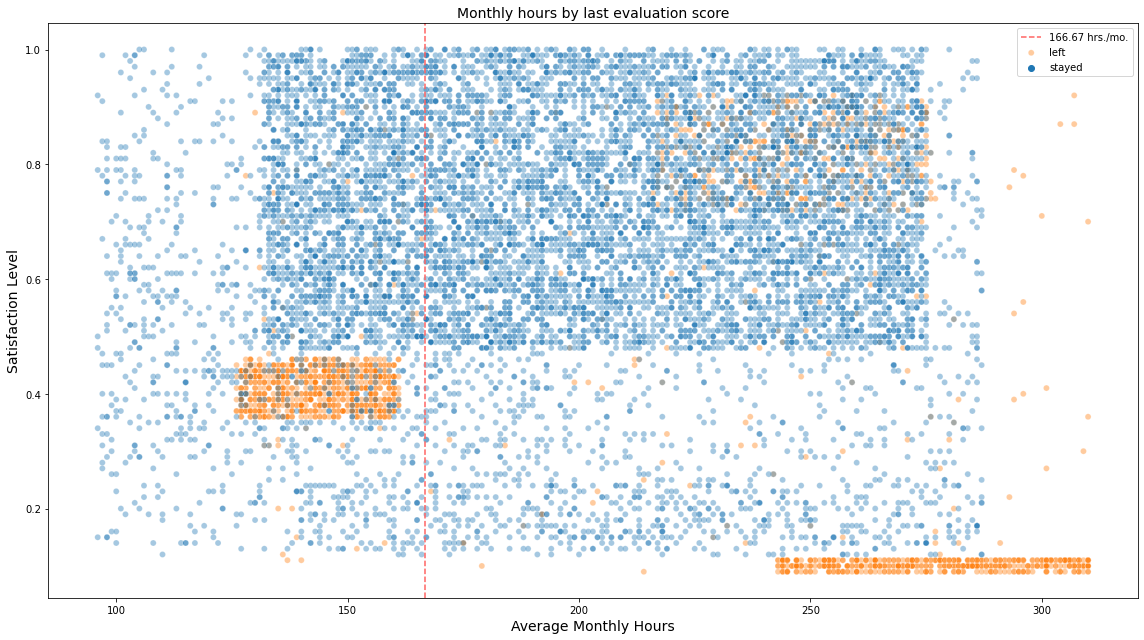

In [86]:
# satisfaction level vs. avg mo hours
hue_labels = {0: 'stayed', 1: 'left'}
plt.figure(figsize=(16,9))
ax = sns.scatterplot(data=df1, x='avg_mo_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
ax.set_xlabel('Average Monthly Hours', fontsize=14)
ax.set_ylabel('Satisfaction Level', fontsize=14)
plt.title('Monthly hours by last evaluation score', fontsize='14');
plt.tight_layout()
plt.show()

- I see 3 groups that stick out.  
    - Group A employees that left with satisfaction levels of 0 working on average 185-330 hours per month. 
    - Group B employees that left working an acceptable range of hours reporting a satisfaction level of 0.3 - 0.45.  
    - Group C employees that left working a slightly higher than normal acceptable range of working hours that gave the company really good ratings of 0,7-0.85 satisfaction levels (and left anyways).
    - The Majority of employees that stayed gave satisfaction level ratings between 0.45-1.0.

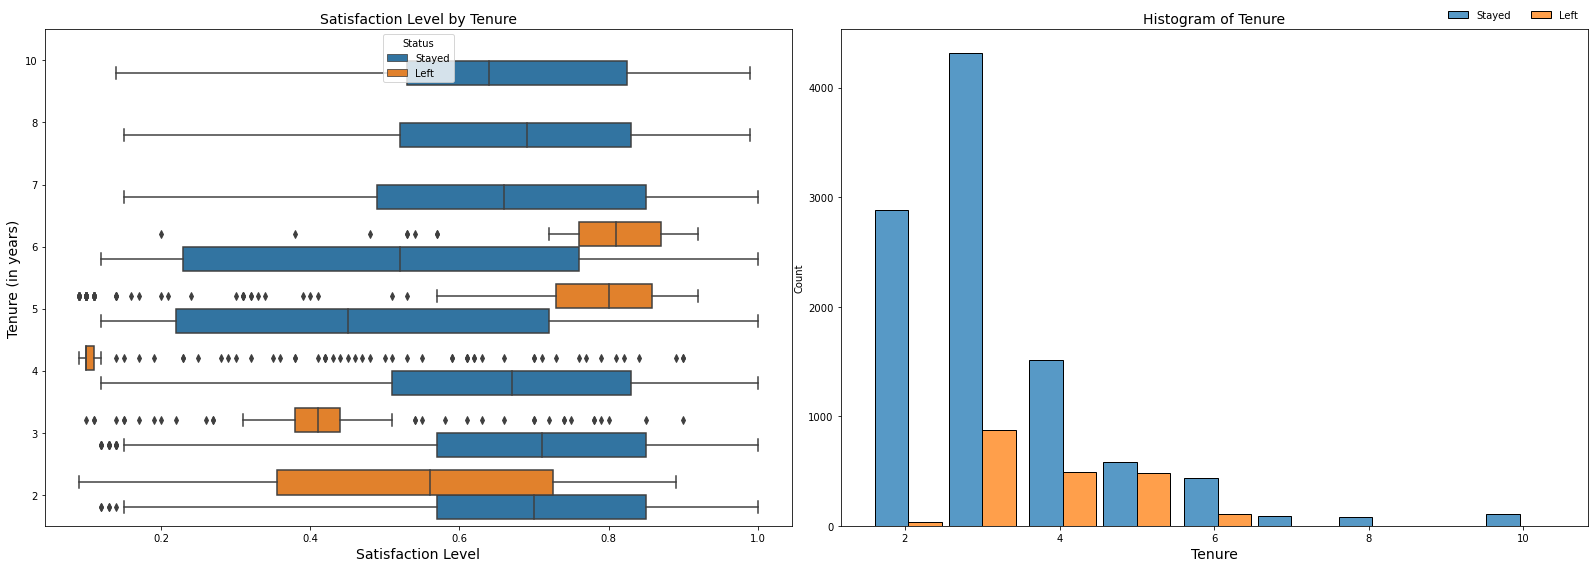

In [87]:
# tenure vs. satisfaction_level
hue_mapping = {0: "Stayed", 1: "Left"}
create_boxplot_and_histplot(
    df=df1, 
    box_x='satisfaction_level', box_y='tenure',
    box_xlabel='Satisfaction Level', box_ylabel='Tenure (in years)',
    box_title='Satisfaction Level by Tenure',
    hue='left',
    hist_x='tenure', 
    hist_xlabel='Tenure',
    hist_title='Histogram of Tenure',
    legend_labels=hue_mapping, legend_title='Status',
    hist_shrink=10
)

- There seems to be two groups for employees that left
    - very dissatisfied employees with shorter tenure
    - very satisfied employees with longer tenure
- Longest Tenured employees did not leave
- It's worth looking into what happened around year 4, to explain that dissatisfaction.

In [88]:
df1.groupby('left')['satisfaction_level'].agg([np.mean, np.median])

mean  median
left                  
0     0.667365    0.69
1     0.440271    0.41

In [89]:
df1.groupby('left')['satisfaction_level'].describe().loc[:, ['mean', '50%']]


mean   50%
left                
0     0.667365  0.69
1     0.440271  0.41

In [90]:
print(df1.columns.values)

['satisfaction_level' 'last_evaluation' 'num_projects' 'avg_mo_hours'
 'tenure' 'work_accident' 'left' 'promotion' 'department' 'salary']


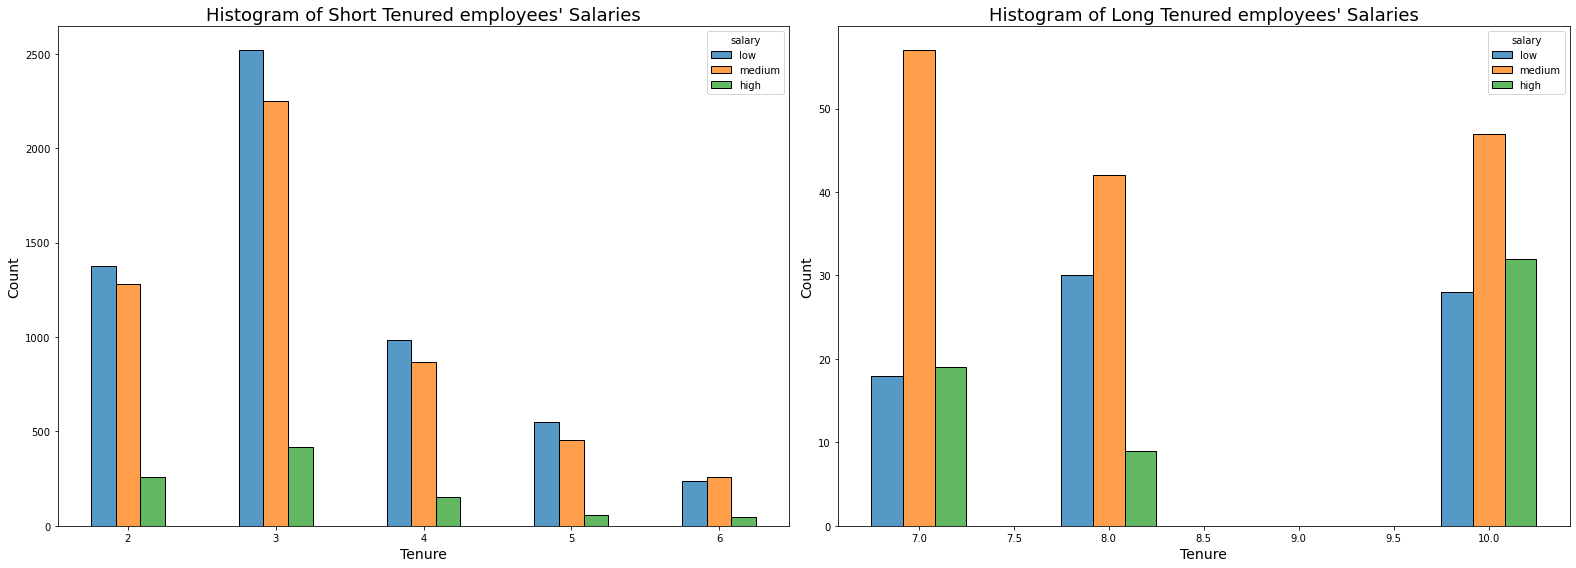

In [91]:
# Examine Salaries by tenure level

fig, ax = plt.subplots(1, 2, figsize=(22,8))
mask = df1['tenure'] < 7
short_tenure = df1[mask]
mask = df1['tenure'] > 6
long_tenure = df1[mask]

# histogram of short tenure
sns.histplot(data=short_tenure, x='tenure', hue='salary', discrete=1, multiple='dodge', shrink=0.5, ax=ax[0], hue_order=['low', 'medium', 'high'])
ax[0].set_xlabel('Tenure', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)
ax[0].set_title("Histogram of Short Tenured employees' Salaries", fontsize=18)

# histogram of long tenure
sns.histplot(data=long_tenure, x='tenure', hue='salary', discrete=1, multiple='dodge', shrink=0.5, ax=ax[1], hue_order=['low', 'medium', 'high'])
ax[1].set_xlabel('Tenure', fontsize=14)
ax[1].set_ylabel('Count', fontsize=14)
ax[1].set_title("Histogram of Long Tenured employees' Salaries", fontsize=18)

plt.tight_layout()
plt.show()



- shorter tenured employees have lower salaries
- higher tenured employees tend to have medium and higher salaries

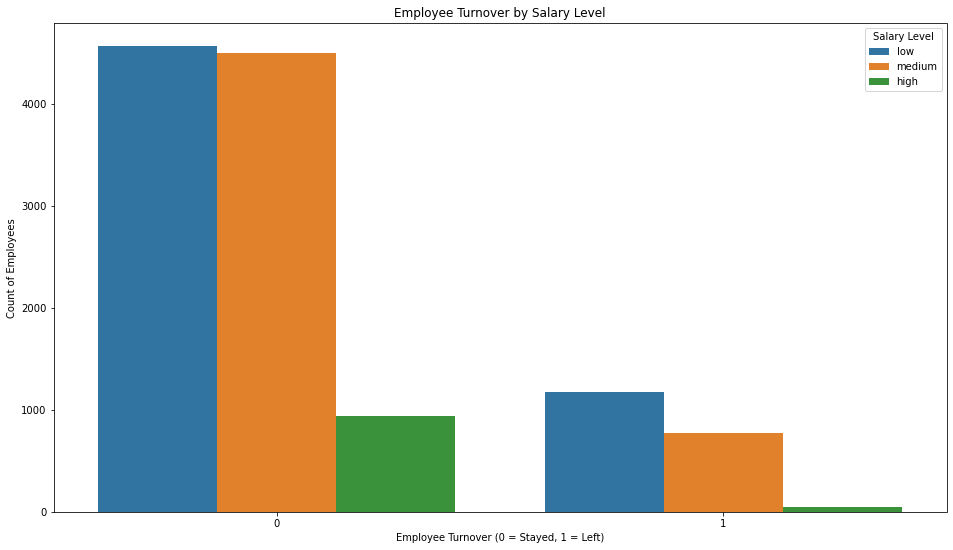

In [92]:
plt.figure(figsize=(16,9))
sns.countplot(data=df1, x='left', hue='salary')
plt.xlabel("Employee Turnover (0 = Stayed, 1 = Left)")
plt.ylabel("Count of Employees")
plt.title("Employee Turnover by Salary Level")
plt.legend(title="Salary Level")
plt.show()


- employees that left make less money (majority is low and medium salaries, proportionally).
- interestingly enough, employees that stayed have a lot of low salary representation.

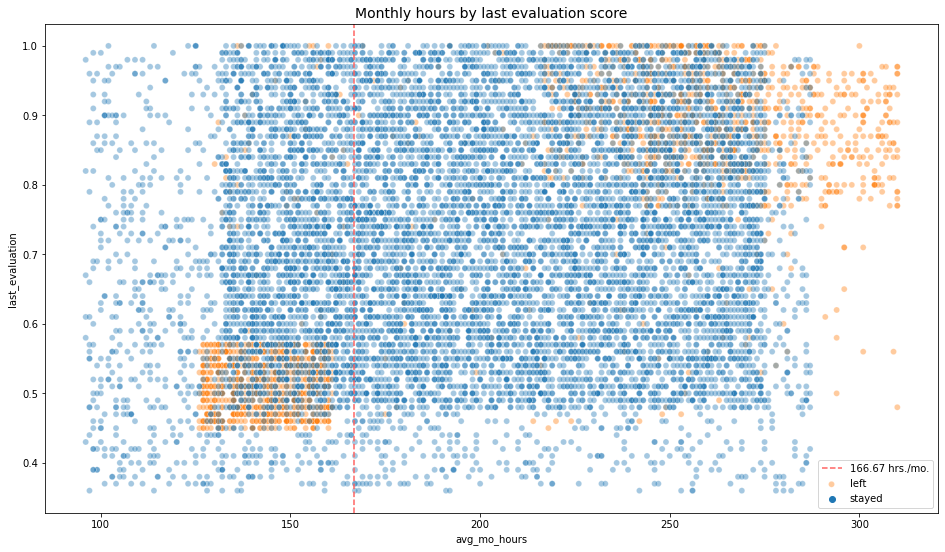

In [93]:
# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='avg_mo_hours', y='last_evaluation', hue='left', alpha=0.4)
# plot an axvline where you think is a normal amount of hours to work
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

- this plot looks almost exactly like the average monthly hours vs. satisfaction levels scatterplot

In [94]:
df1['promotion'].unique()

array([0, 1])

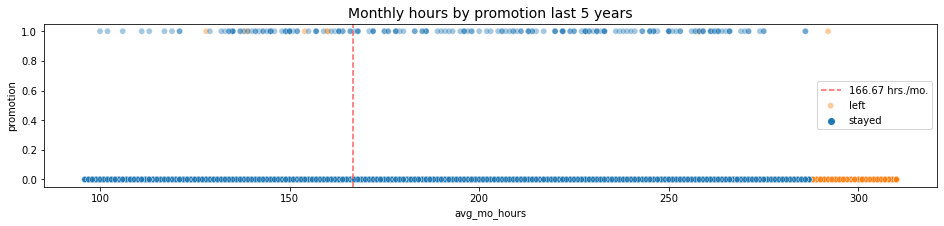

In [95]:
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='avg_mo_hours', y='promotion', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

- all employees not promoted that worked over 275 average monthly hours, left.

In [96]:
# how are employees distributed across departments that left?
df1.groupby('department')['left'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

department   left
IT           0       83.81%
             1       16.19%
RandD        0       87.75%
             1       12.25%
accounting   0       82.45%
             1       17.55%
hr           0        81.2%
             1        18.8%
management   0       88.07%
             1       11.93%
marketing    0       83.36%
             1       16.64%
product_mng  0       83.97%
             1       16.03%
sales        0       83.02%
             1       16.98%
support      0       82.87%
             1       17.13%
technical    0       82.62%
             1       17.38%
Name: left, dtype: object

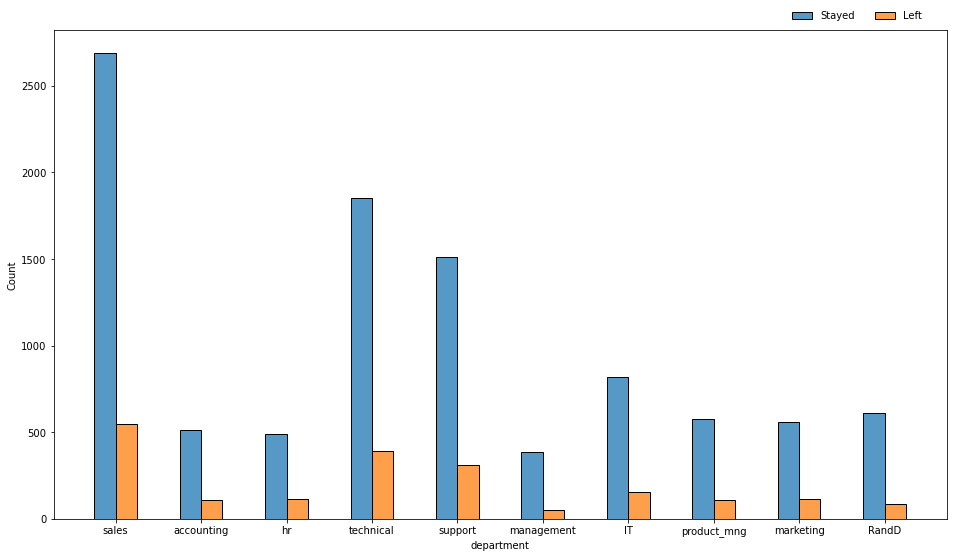

In [97]:
plt.figure(figsize=(16,9))
ax = sns.histplot(data=df1, x='department', hue='left', multiple='dodge', shrink=0.5)
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.9, 1), ncol=2, title=None, frameon=False,
)
legend = ax.get_legend()
new_labels = ['Stayed', 'Left']
for text, label in zip(legend.texts, new_labels):
    text.set_text(label)

- Accounting and HR had the highest proportion of employees who left relative to their department size.
- Based on counts alone, Sales, Technical, and support had the most employees that left.

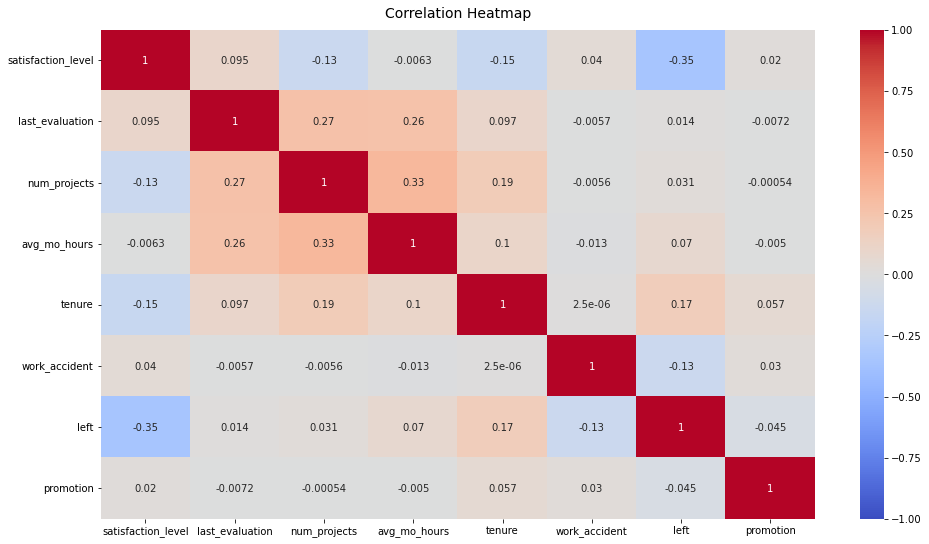

In [98]:
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("coolwarm", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

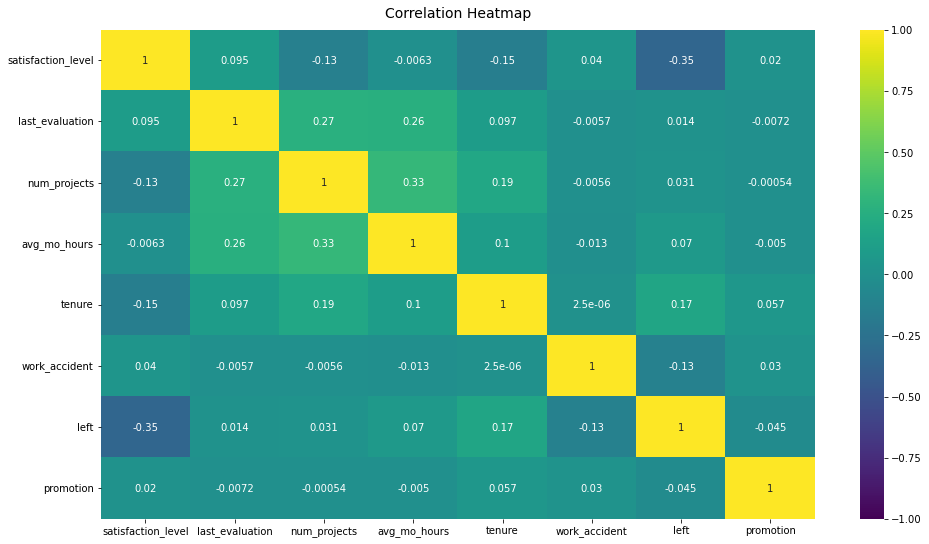

In [99]:
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("viridis", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

- correlation heatmap says that whether an employees leaves is negatively correlated with how satisfied they are at the company.
- number of projects, monthly hours, and evalution scores are correlated with employees leaving.


In [100]:
df1.corr()

satisfaction_level  last_evaluation  num_projects  \
satisfaction_level            1.000000         0.095186     -0.133246   
last_evaluation               0.095186         1.000000      0.270256   
num_projects                 -0.133246         0.270256      1.000000   
avg_mo_hours                 -0.006252         0.264678      0.331516   
tenure                       -0.152915         0.096829      0.188837   
work_accident                 0.039940        -0.005695     -0.005612   
left                         -0.350558         0.013520      0.030928   
promotion                     0.019789        -0.007206     -0.000544   

                    avg_mo_hours    tenure  work_accident      left  promotion  
satisfaction_level     -0.006252 -0.152915       0.039940 -0.350558   0.019789  
last_evaluation         0.264678  0.096829      -0.005695  0.013520  -0.007206  
num_projects            0.331516  0.188837      -0.005612  0.030928  -0.000544  
avg_mo_hours            1.000000  0.102875      -0.012860  0.070409  -0.004964  
tenure                  0.102875  1.000000       0.000003  0.173295   0.056828  
work_accident          -0.012860  0.000003       1.000000 -0.125436   0.029852  
left                    0.070409  0.173295      -0.125436  1.000000  -0.044657  
promotion              -0.004964  0.056828       0.029852 -0.044657   1.000000

In [101]:
# I definitely do not have linear relationship worth exploring spearman and kendall
def plot_correlation_heatmaps(df, correlation_methods=['pearson', 'spearman', 'kendall']):
    colors = ['viridis', 'magma', 'coolwarm']

    fig, axes = plt.subplots(1, 3, figsize=(24, 8))

    for i, method in enumerate(correlation_methods):
        corr_matrix = df1.corr(method=method)
        heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap=sns.color_palette(colors[i], as_cmap=True), ax=axes[i])
        heatmap.set_title(f'Correlation Heatmap ({method.capitalize()})', fontdict={'fontsize': 14}, pad=12)

    plt.tight_layout()
    plt.show()

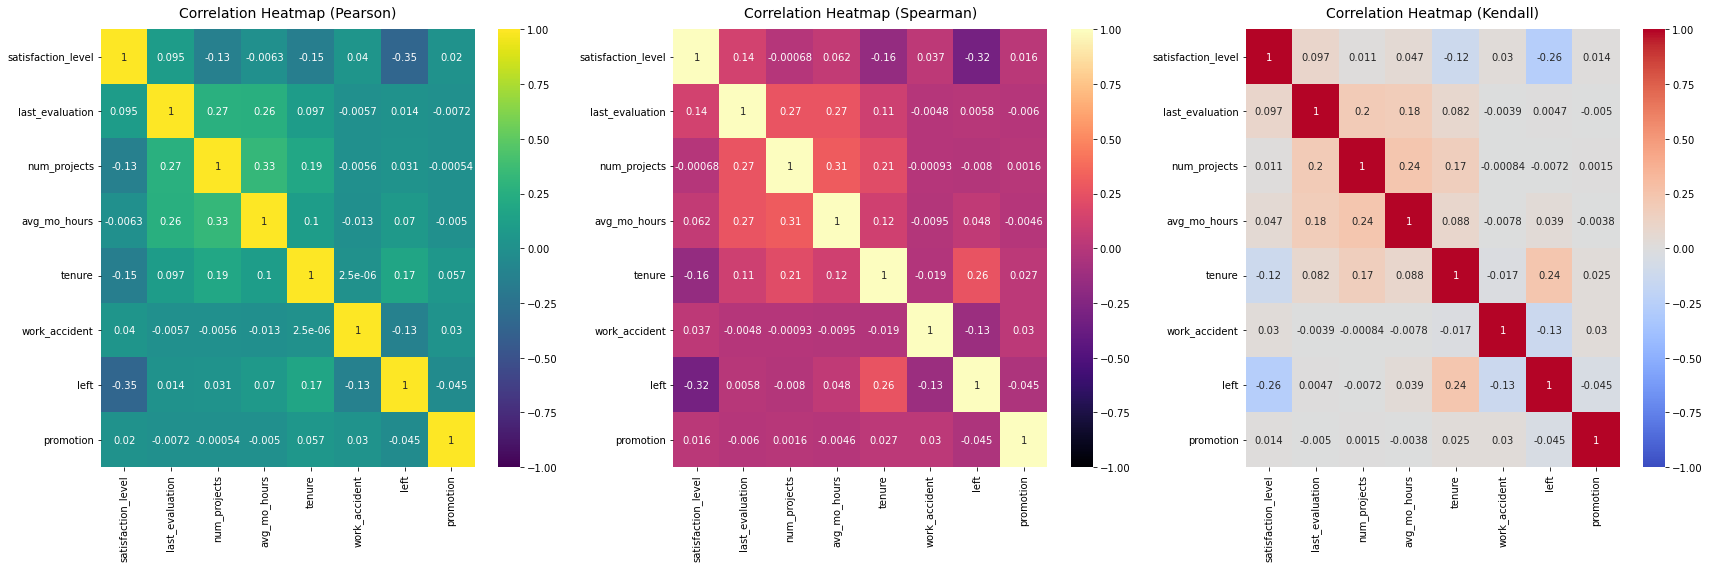

In [102]:
plot_correlation_heatmaps(df1)

### Insights

It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave. 

# paCe: Construct Stage

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

- classification task (there is a binary outcome of either "left" or "stayed")

### Identify the types of models most appropriate for this task.

- logistic regression, decision tree, random forest, xgboost
- more specifically, binomial logistic regression

### Modeling (Logistic Regression)

In [103]:
df1.dtypes

satisfaction_level    float64
last_evaluation       float64
num_projects            int64
avg_mo_hours            int64
tenure                  int64
work_accident           int64
left                    int64
promotion               int64
department             object
salary                 object
dtype: object

In [104]:
df_enc = df1.copy()
# you can encode 2 ways: 1) ordinal numeric (where rankings and order mean something in the data), and 2) dummy encode
print(df_enc['salary'].unique())
df_enc['salary'] = df_enc['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes
print(df_enc['salary'].unique())

df_enc = pd.get_dummies(df_enc, drop_first=False)
print(df_enc.dtypes)
df_enc.head()

['low' 'medium' 'high']
[0 1 2]
satisfaction_level        float64
last_evaluation           float64
num_projects                int64
avg_mo_hours                int64
tenure                      int64
work_accident               int64
left                        int64
promotion                   int64
salary                       int8
department_IT               uint8
department_RandD            uint8
department_accounting       uint8
department_hr               uint8
department_management       uint8
department_marketing        uint8
department_product_mng      uint8
department_sales            uint8
department_support          uint8
department_technical        uint8
dtype: object


satisfaction_level  last_evaluation  num_projects  avg_mo_hours  tenure  \
0                0.38             0.53             2           157       3   
1                0.80             0.86             5           262       6   
2                0.11             0.88             7           272       4   
3                0.72             0.87             5           223       5   
4                0.37             0.52             2           159       3   

   work_accident  left  promotion  salary  department_IT  department_RandD  \
0              0     1          0       0              0                 0   
1              0     1          0       1              0                 0   
2              0     1          0       1              0                 0   
3              0     1          0       0              0                 0   
4              0     1          0       0              0                 0   

   department_accounting  department_hr  department_management  \
0                      0              0                      0   
1                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   

   department_marketing  department_product_mng  department_sales  \
0                     0                       0                 1   
1                     0                       0                 1   
2                     0                       0                 1   
3                     0                       0                 1   
4                     0                       0                 1   

   department_support  department_technical  
0                   0                     0  
1                   0                     0  
2                   0                     0  
3                   0                     0  
4                   0                     0

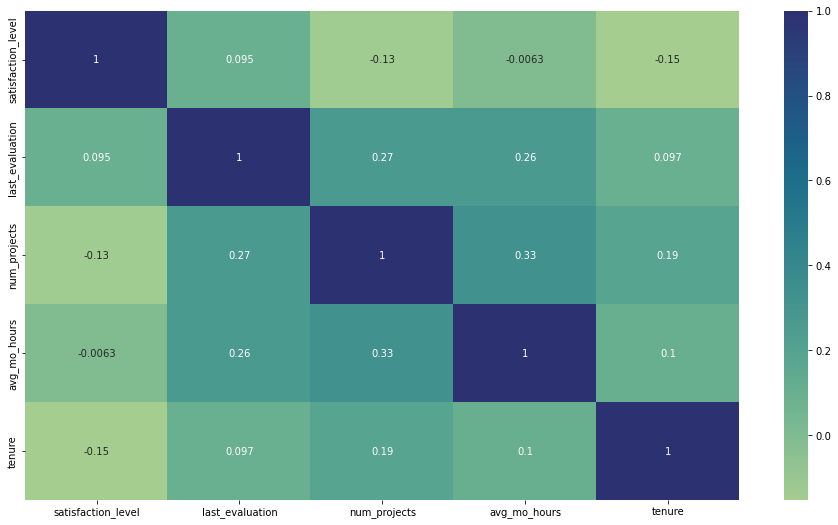

In [105]:
plt.figure(figsize=(16,9))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'num_projects', 'avg_mo_hours', 'tenure']]
            .corr(), annot=True, cmap='crest')
plt.show()

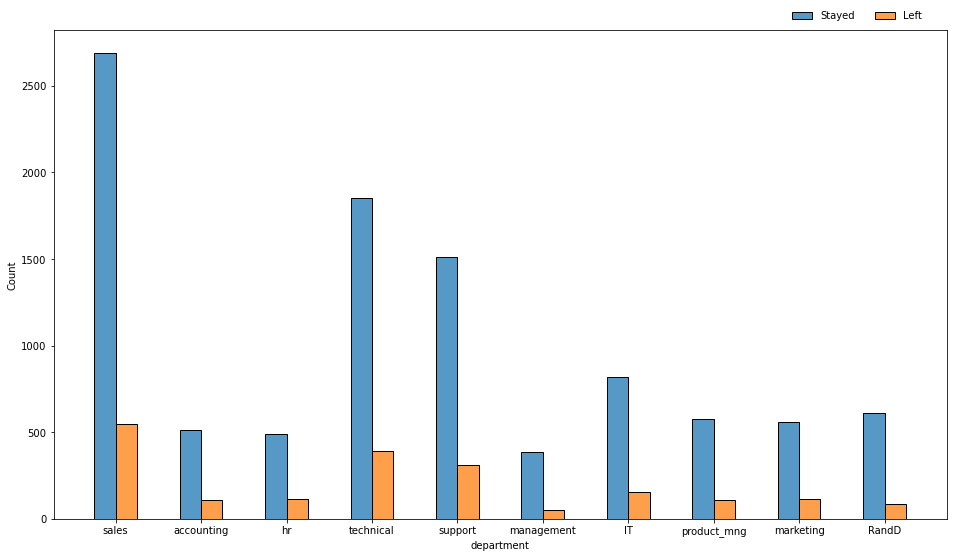

In [106]:
plt.figure(figsize=(16,9))
ax = sns.histplot(data=df1, x='department', hue='left', multiple='dodge', shrink=0.5)
# Get legend for histogram
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.9, 1), ncol=2, title=None, frameon=False,
)
# Get the legend object for histogram
legend = ax.get_legend()
# Modify the labels
new_labels = ['Stayed', 'Left']
for text, label in zip(legend.texts, new_labels):
    text.set_text(label)

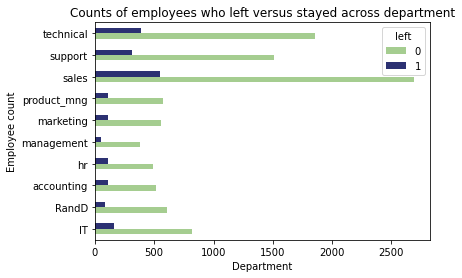

In [107]:
pd.crosstab(df1['department'], df1['left']).plot(kind ='barh',colormap='crest')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

In [108]:
within_upper = df_enc['tenure'] <= upper_limit
within_lower = df_enc['tenure'] >= lower_limit
df_logreg = df_enc[within_lower & within_upper]
print(df_logreg.shape)
df_logreg.head()

'''iqr: 1.0
upper_limit: 5.5
lower_limit: 1.5
(824, 10)
(11991, 10)
(11167, 10)'''


(11167, 19)


'iqr: 1.0\nupper_limit: 5.5\nlower_limit: 1.5\n(824, 10)\n(11991, 10)\n(11167, 10)'

In [109]:
y = df_logreg['left']
print(y.shape)
y.head()

(11167,)


0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [110]:
X = df_logreg.drop('left', axis=1)
print(X.shape)
X.head()

(11167, 18)


satisfaction_level  last_evaluation  num_projects  avg_mo_hours  tenure  \
0                0.38             0.53             2           157       3   
2                0.11             0.88             7           272       4   
3                0.72             0.87             5           223       5   
4                0.37             0.52             2           159       3   
5                0.41             0.50             2           153       3   

   work_accident  promotion  salary  department_IT  department_RandD  \
0              0          0       0              0                 0   
2              0          0       1              0                 0   
3              0          0       0              0                 0   
4              0          0       0              0                 0   
5              0          0       0              0                 0   

   department_accounting  department_hr  department_management  \
0                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   
5                      0              0                      0   

   department_marketing  department_product_mng  department_sales  \
0                     0                       0                 1   
2                     0                       0                 1   
3                     0                       0                 1   
4                     0                       0                 1   
5                     0                       0                 1   

   department_support  department_technical  
0                   0                     0  
2                   0                     0  
3                   0                     0  
4                   0                     0  
5                   0                     0

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [112]:
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [113]:
y_pred = log_clf.predict(X_test)

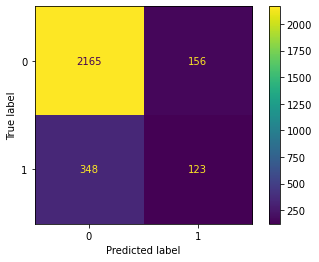

In [114]:
log_cm = confusion_matrix(y_test, y_pred, log_clf.classes_)
log_disp = ConfusionMatrixDisplay(log_cm, display_labels = log_clf.classes_)
log_disp.plot(values_format='')
plt.show()

- baseline logistic predicted many more false negatives than false positives.  In fact, it got most of the positives wrong.  The model seems to be very cautious to predict true unless it's absolutely sure.

In [115]:
# medium imbalanced
df_enc['left'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

0    83.4%
1    16.6%
Name: left, dtype: object

In [116]:
target_names = ['Predict left', 'Predicted stayed']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

    Predict left       0.86      0.93      0.90      2321
Predicted stayed       0.44      0.26      0.33       471

        accuracy                           0.82      2792
       macro avg       0.65      0.60      0.61      2792
    weighted avg       0.79      0.82      0.80      2792



# Decision Tree

In [117]:
y = df_enc['left']
X = df_enc.drop('left', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

tree = DecisionTreeClassifier(random_state=0)

cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
clf = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [118]:
%%time
clf.fit(X_train, y_train)

CPU times: user 2.95 s, sys: 50.5 ms, total: 3 s
Wall time: 3 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [119]:
print(clf.best_params_)
print(clf.best_score_)

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.9710911037253271


# Save results from Model iteration experiments

In [199]:
def make_results(model_name:str, model_object, metric:str):
    '''helps compare models during hyperparameter tuning.
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
#     auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
#                           'auc': [auc]
                        })
  
    return table

In [148]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''checks generalization performance on a separate test set.
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [149]:
# Define a path to the folder where you want to save the model
path = '/home/jovyan/work/'

In [150]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [151]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [152]:
decision_tree_results = make_results('decision tree CV', clf, 'auc')

In [153]:
decision_tree_results

model  precision    recall        F1  accuracy       auc
0  decision tree CV   0.926282  0.917764  0.921857  0.974145  0.971091

In [154]:
decision_tree_results.to_csv(path + 'decision_tree_results.csv')

In [155]:
tree_results = pd.read_csv(path + 'decision_tree_results.csv')
tree_results

Unnamed: 0             model  precision    recall        F1  accuracy  \
0           0  decision tree CV   0.926282  0.917764  0.921857  0.974145   

        auc  
0  0.971091

# RandomForest

In [156]:
rf = RandomForestClassifier(random_state=0)
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
rf_clf = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [157]:
%%time
# comment this out as soon as you finish training
# rf_clf.fit(X_train, y_train) # --> Wall time: ~10min

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 9.06 µs


In [158]:
# write_pickle(path, rf_clf, 'rf_clf1')

In [159]:
rf1 = read_pickle(path, 'rf_clf1')

In [160]:
print(rf1.best_score_)
print(rf1.best_params_)

0.9793947236268321
{'max_depth': 5, 'max_features': 1.0, 'max_samples': 0.7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [161]:
rf_clf1_results = make_results('RandomForest CV', rf1, 'auc')
rf_clf1_results

model  precision    recall        F1  accuracy       auc
0  RandomForest CV   0.949339  0.914625  0.931569   0.97769  0.979395

In [162]:
rf_clf1_results.to_csv(path + 'rf_clf1_results.csv')

In [137]:
# comment out auc_roc in make_results for xgboost

# XGBoost Random Forest Classifier

In [164]:
# Cross-validated hyperparameter tuning ~10-15 min with little parameters
xgb = XGBClassifier(objective='binary:logistic', random_state=0) 
cv_params = {'max_depth': [8], 
             'min_child_weight': [2],
             'learning_rate': [0.1],
             'n_estimators': [300]
             }    
scoring = {'accuracy', 'precision', 'recall', 'f1'}
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='f1')

In [165]:
# %%time
# comment this out once fitted
# xgb_cv.fit(X_train, y_train)

In [166]:
# write_pickle(path, xgb_cv, 'xgb_cv')

In [167]:
xgb1 = read_pickle(path, 'xgb_cv')

In [168]:
xgb1_results = make_results('XGBoost CV', xgb1, 'f1')
xgb1_results

model  precision   recall      F1  accuracy
0  XGBoost CV   0.977977  0.91651  0.9462  0.982694

In [169]:
xgb1_results.to_csv(path + 'xgb1_results.csv')

In [170]:
combined_results = pd.concat([decision_tree_results, rf_clf1_results, xgb1_results])
combined_results.sort_values(by=['F1'], ascending=False)

model  precision    recall        F1  accuracy       auc
0        XGBoost CV   0.977977  0.916510  0.946200  0.982694       NaN
0   RandomForest CV   0.949339  0.914625  0.931569  0.977690  0.979395
0  decision tree CV   0.926282  0.917764  0.921857  0.974145  0.971091

In [171]:
combined_results.sort_values(by=['auc'], ascending=False)

model  precision    recall        F1  accuracy       auc
0   RandomForest CV   0.949339  0.914625  0.931569  0.977690  0.979395
0  decision tree CV   0.926282  0.917764  0.921857  0.974145  0.971091
0        XGBoost CV   0.977977  0.916510  0.946200  0.982694       NaN

In [172]:
combined_results.to_csv(path + 'combined_results_1.csv')

In [173]:
# based on auc, best model is RandomFores (we do not have XGBoost scores for auc)
# based on f1, best model is XGBoost

# get prediction on test data

In [174]:
best_model_scores = get_scores('XGBoost CV', xgb1, X_test, y_test)
best_model_scores

model  precision    recall        f1  accuracy       AUC
0  XGBoost CV   0.978552  0.917085  0.946822   0.98291  0.956544

# make confusion matrix

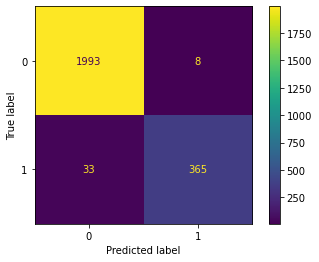

In [175]:
y_test_preds = xgb1.best_estimator_.predict(X_test)
xgb_cm = confusion_matrix(y_test, y_test_preds, labels=xgb1.classes_)
xgb_disp = ConfusionMatrixDisplay(xgb_cm, display_labels=xgb1.classes_)
xgb_disp.plot(values_format='')
plt.show()

# Look at plot_tree for decision_tree and RandomForest

## Decision Tree

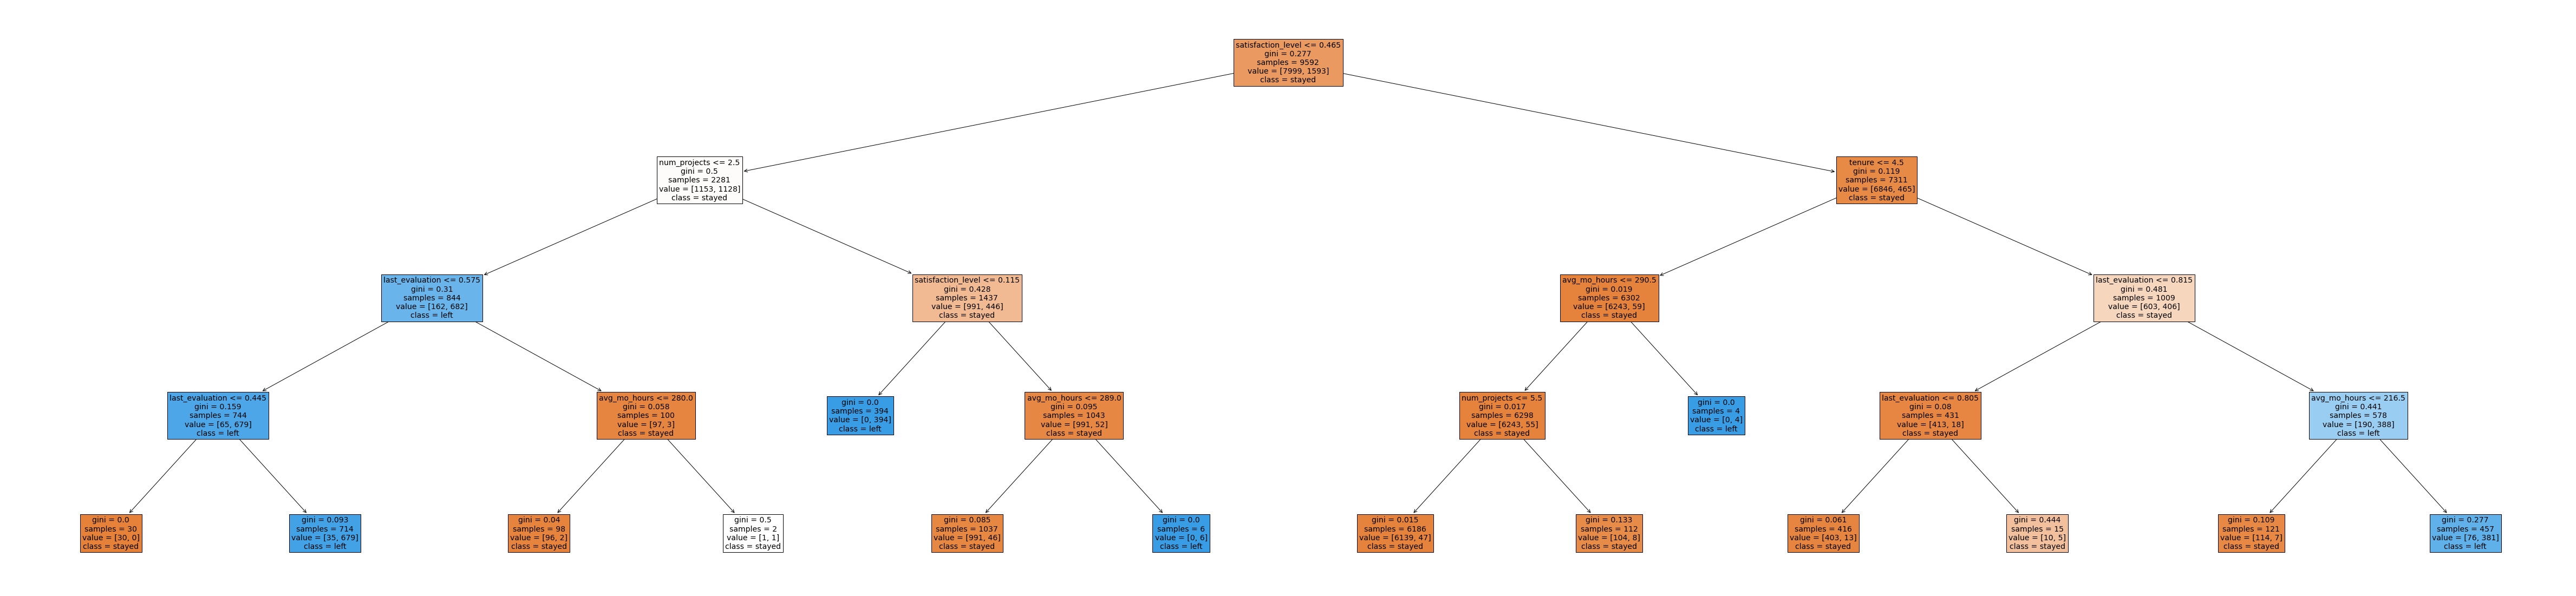

In [176]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(clf.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [177]:
dt_importances = pd.DataFrame(clf.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
dt_importances.sort_values(by=['gini_importance'], ascending=False)

gini_importance
satisfaction_level             0.524000
last_evaluation                0.174854
tenure                         0.121162
num_projects                   0.119184
avg_mo_hours                   0.060800
department_hr                  0.000000
department_support             0.000000
department_sales               0.000000
department_product_mng         0.000000
department_marketing           0.000000
department_management          0.000000
department_RandD               0.000000
department_accounting          0.000000
department_IT                  0.000000
salary                         0.000000
promotion                      0.000000
work_accident                  0.000000
department_technical           0.000000

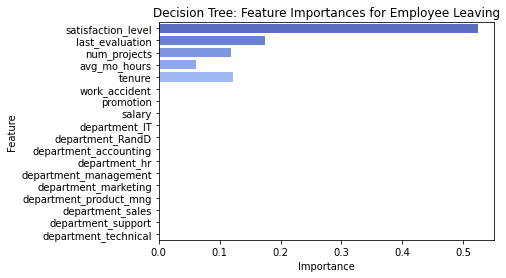

In [233]:
sns.barplot(data=dt_importances, x="gini_importance", y=dt_importances.index, orient='h', palette='coolwarm')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

## Random Forest

In [179]:
rf_importances = pd.DataFrame(rf1.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
rf_importances.sort_values(by=['gini_importance'], ascending=False)

gini_importance
satisfaction_level             0.499415
num_projects                   0.157992
last_evaluation                0.146181
tenure                         0.117741
avg_mo_hours                   0.077386
department_technical           0.000302
salary                         0.000230
department_marketing           0.000159
department_RandD               0.000125
department_hr                  0.000115
department_IT                  0.000111
department_sales               0.000089
department_accounting          0.000070
department_support             0.000048
work_accident                  0.000023
department_product_mng         0.000010
department_management          0.000002
promotion                      0.000002

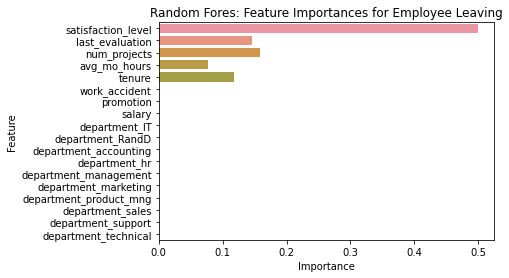

In [232]:
sns.barplot(data=rf_importances, x="gini_importance", y=rf_importances.index, orient='h')
plt.title("Random Fores: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

# Feature Engineering
## Round 2 decision tree, random forest, and xgboost

### Feature Engineering Prep

In [181]:
# drop satisfaction level
df2 = df_enc.drop('satisfaction_level', axis=1)

In [182]:
# create overworked column
df2['overworked'] = df_enc['avg_mo_hours']
df2['overworked'].describe()
'''
count    11991.000000
mean       200.473522
std         48.727813
min         96.000000
25%        157.000000
50%        200.000000
75%        243.000000
max        310.000000
'''

'\ncount    11991.000000\nmean       200.473522\nstd         48.727813\nmin         96.000000\n25%        157.000000\n50%        200.000000\n75%        243.000000\nmax        310.000000\n'

- 166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day. 

- You could define being overworked as working more than 175 hours per month on average.

In [183]:
df2['overworked'] = (df2['overworked'] > 175).astype(int)
df2['overworked'].value_counts()

1    7630
0    4361
Name: overworked, dtype: int64

In [184]:
df2 = df2.drop('avg_mo_hours', axis=1)
df2.shape

(11991, 18)

In [185]:
y = df2['left']
X = df2.drop('left', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

### Decision Tree after Feature Engineering

In [186]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [187]:
# %%time
# tree2.fit(X_train, y_train)

In [188]:
# path, model_object, save_as:str
# write_pickle(path, tree2, 'decision_tree_2')

In [189]:
dt2 = read_pickle(path, 'decision_tree_2')
print(dt2.best_params_)
print(dt2.best_score_)

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 6}
0.9593274693440157


In [191]:
decision_tree_2_results = make_results('decision tree 2 CV', dt2, 'auc')
decision_tree_2_results

model  precision    recall        F1  accuracy       auc
0  decision tree 2 CV   0.824575  0.902711  0.861388  0.951731  0.959327

In [192]:
decision_tree_2_results.to_csv(path + 'decision_tree_2_results.csv')


### Random Forest after Feature Engineering

In [193]:
rf_part2 = RandomForestClassifier(random_state=0)
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
rf_clf2 = GridSearchCV(rf_part2, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [194]:
# %%time
# comment this out as soon as you finish training
# rf_clf2.fit(X_train, y_train) # --> Wall time: ~10min

In [195]:
# write_pickle(path, rf_clf2, 'rf_clf2')

In [196]:
rf2 = read_pickle(path, 'rf_clf2')
print(rf2.best_score_)
print(rf2.best_params_)

0.9640511882941997
{'max_depth': 5, 'max_features': 1.0, 'max_samples': 0.7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}


In [197]:
rf_clf2_results = make_results('RandomForest 2 CV', rf2, 'auc')
rf_clf2_results

model  precision    recall        F1  accuracy       auc
0  RandomForest 2 CV   0.863791  0.902698  0.882784  0.960175  0.964051

In [198]:
rf_clf2_results.to_csv(path + 'rf_clf2_results.csv')

In [200]:
# comment out auc in make_results before doing xgboost


### XGBoost after Feature Engineering

In [201]:
xgb_part2 = XGBClassifier(objective='binary:logistic', random_state=0) 
cv_params = {'max_depth': [5], 
             'min_child_weight': [2],
             'learning_rate': [0.1],
             'n_estimators': [300]
             }    
scoring = {'accuracy', 'precision', 'recall', 'f1'}
xgb_cv2 = GridSearchCV(xgb_part2, cv_params, scoring=scoring, cv=4, refit='f1')

In [ ]:
# %%time
# comment this out once fitted
# xgb_cv2.fit(X_train, y_train)

In [202]:
# write_pickle(path, xgb_cv2, 'xgb_cv2')

In [203]:
xgb2 = read_pickle(path, 'xgb_cv2')

In [204]:
xgb2_results = make_results('XGBoost 2 CV', xgb2, 'f1')
xgb2_results.to_csv(path + 'xgb2_results.csv')

### Combined Results

In [205]:
combined_results = pd.concat([decision_tree_results, decision_tree_2_results, rf_clf1_results, rf_clf2_results, xgb1_results, xgb2_results])
combined_results

model  precision    recall        F1  accuracy       auc
0    decision tree CV   0.926282  0.917764  0.921857  0.974145  0.971091
0  decision tree 2 CV   0.824575  0.902711  0.861388  0.951731  0.959327
0     RandomForest CV   0.949339  0.914625  0.931569  0.977690  0.979395
0   RandomForest 2 CV   0.863791  0.902698  0.882784  0.960175  0.964051
0          XGBoost CV   0.977977  0.916510  0.946200  0.982694       NaN
0        XGBoost 2 CV   0.907583  0.878846  0.892868  0.964971       NaN

In [206]:
combined_results.sort_values(by=['F1'], ascending=False)

model  precision    recall        F1  accuracy       auc
0          XGBoost CV   0.977977  0.916510  0.946200  0.982694       NaN
0     RandomForest CV   0.949339  0.914625  0.931569  0.977690  0.979395
0    decision tree CV   0.926282  0.917764  0.921857  0.974145  0.971091
0        XGBoost 2 CV   0.907583  0.878846  0.892868  0.964971       NaN
0   RandomForest 2 CV   0.863791  0.902698  0.882784  0.960175  0.964051
0  decision tree 2 CV   0.824575  0.902711  0.861388  0.951731  0.959327

In [207]:
combined_results.to_csv(path + 'combined_results_2_f1_sort.csv')

In [208]:
combined_results.sort_values(by=['auc'], ascending=False)

model  precision    recall        F1  accuracy       auc
0     RandomForest CV   0.949339  0.914625  0.931569  0.977690  0.979395
0    decision tree CV   0.926282  0.917764  0.921857  0.974145  0.971091
0   RandomForest 2 CV   0.863791  0.902698  0.882784  0.960175  0.964051
0  decision tree 2 CV   0.824575  0.902711  0.861388  0.951731  0.959327
0          XGBoost CV   0.977977  0.916510  0.946200  0.982694       NaN
0        XGBoost 2 CV   0.907583  0.878846  0.892868  0.964971       NaN

In [209]:
combined_results.to_csv(path + 'combined_results_2_auc_sort.csv')

# Look at plot_tree for decision_tree and RandomForest (Feature Engineered)

In [210]:
best_model_scores = get_scores('RandomForest 2 CV', rf2, X_test, y_test)
best_model_scores

model  precision    recall        f1  accuracy       AUC
0  RandomForest 2 CV   0.857143  0.904523  0.880196   0.95915  0.937269

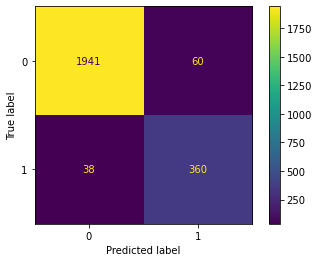

In [211]:
y_test_preds = rf2.best_estimator_.predict(X_test)
rf2_cm = confusion_matrix(y_test, y_test_preds, labels=rf2.classes_)
rf2_disp = ConfusionMatrixDisplay(rf2_cm, display_labels=rf2.classes_)
rf2_disp.plot(values_format='')
plt.show()

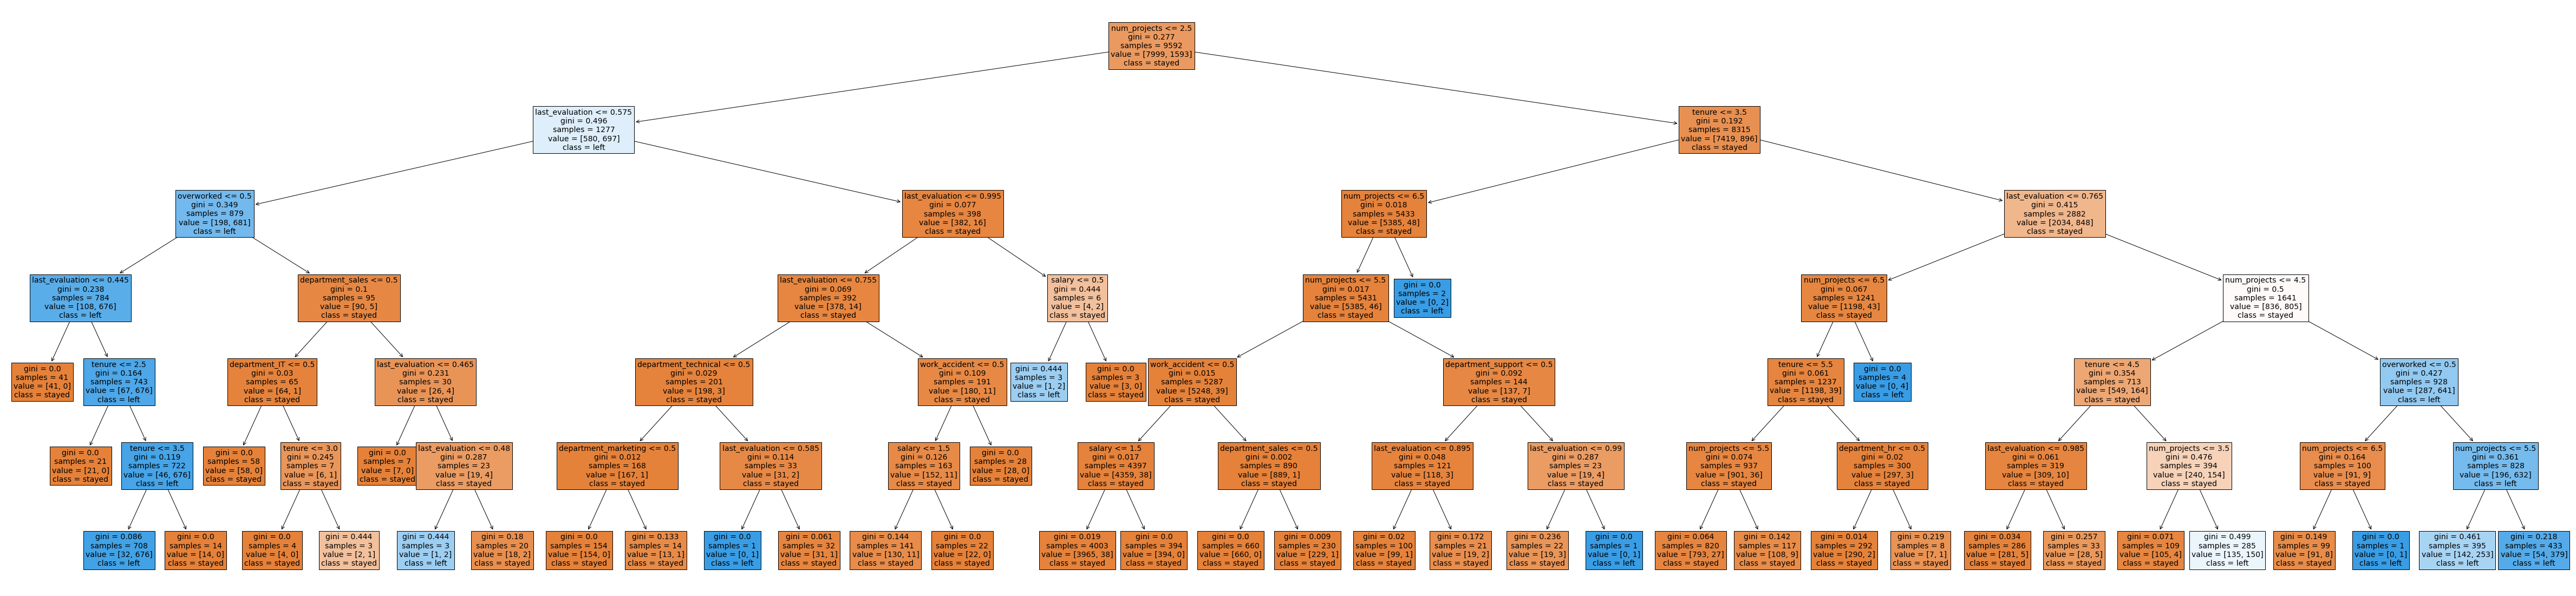

In [212]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(dt2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

                        gini_importance
num_projects                   0.345247
last_evaluation                0.340673
tenure                         0.213109
overworked                     0.098842
salary                         0.000839
department_support             0.000443
department_sales               0.000297
work_accident                  0.000155
department_IT                  0.000131
department_hr                  0.000112
department_technical           0.000085
department_marketing           0.000067
promotion                      0.000000
department_RandD               0.000000
department_management          0.000000
department_product_mng         0.000000
department_accounting          0.000000


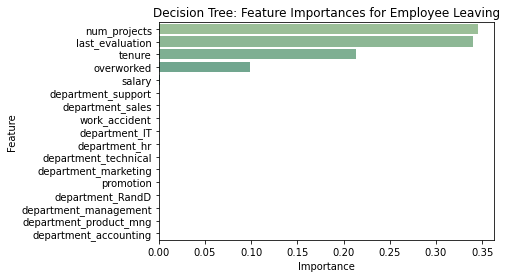

In [229]:
# feature importance for Decision Tree
dt2_importances = pd.DataFrame(dt2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
dt2_importances = dt2_importances.sort_values('gini_importance', ascending=False)
print(dt2_importances)
sns.barplot(data=dt2_importances, x="gini_importance", y=dt2_importances.index, orient='h', palette='crest')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

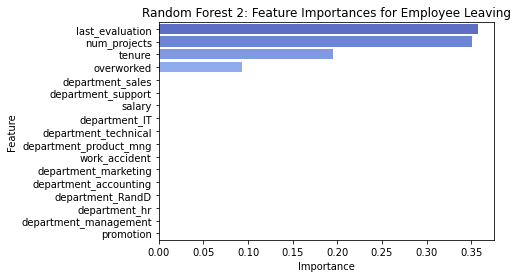

In [231]:
# feature importance for RandomForest
rf2_importances = pd.DataFrame(rf2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
rf2_importances = rf2_importances.sort_values('gini_importance', ascending=False)
sns.barplot(data=rf2_importances, x="gini_importance", y=rf2_importances.index, orient='h', palette='coolwarm')
plt.title("Random Forest 2: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

# pacE: Execute Stage

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




# Summary of model results

### Summary of Model Performance

- **Logistic Regression** achieved **80% precision, 82% recall, and an F1-score of 80%.**  
- **Decision Tree Classifier** performed significantly better, with **93% precision, 92% recall, an F2-score of 92%, 97% accuracy, and an AUC of 0.97.**  
- **Random Forest Classifier** slightly outperformed the Decision Tree Classifier.  
- **Feature engineering did not improve model performance across any of the tested models.**  
  - Our initial hypothesis that **data leakage may be present in `avg_mo_hours`** appears to be correct, as the second round of models showed improved generalization.  

### Key Insights from Data Exploration and Transformation

- A deep dive into the dataset revealed that **none of the features exhibited a linear relationship with the target variable or with each other.**  
- **Logistic Regression was initially selected** as the best model for fitting the data.  
- Various **skewness correction techniques** were applied to account for non-linear relationships.  
  - The **Quantile Transformer** revealed that certain features—**`last_evaluation` and `avg_mo_hours` (which was later transformed into an `overworked` variable)**—were **quadratically related to the target variable.**  
- Despite this non-linearity, **Logistic Regression remained the most appropriate model choice**, given its ability to generalize well in this scenario.


## Conclusion, Recommendations, and Next Steps

### Key Findings
- **Overwork is a strong predictor of employee attrition**, as indicated by the correlation between **number of projects**, **workload (`overworked`)**, and **employee departures**.  
- **The most predictive features** were **number of projects, performance evaluation, overwork, and tenure**.  
  - **Workload-related factors (`num_projects` and `overworked`)** directly impact retention.  
  - **Performance evaluations may reflect disengagement**, as employees on the verge of leaving might already be working fewer hours and disengaging from their roles.  

### Recommendations
To improve employee retention and morale, the company should consider the following strategies:

- **Limit excessive workload**  
  - Cap the number of projects employees can be assigned.  
  - Ensure workload distribution is balanced to prevent burnout.  

- **Address tenure-related dissatisfaction**  
  - Investigate why employees with **four years of tenure** are more likely to leave.  
  - Consider promotion opportunities or targeted retention strategies for long-tenured employees.  

- **Clarify workload expectations and rewards**  
  - Reward employees for longer working hours **or** avoid requiring excessive overtime.  
  - Clearly communicate overtime pay policies and expectations around workload and time off.  

- **Reassess performance evaluation criteria**  
  - Ensure high evaluations are not disproportionately tied to working 200+ hours per month.  
  - Implement a **proportionate reward system** that fairly recognizes contributions and effort.  

- **Encourage open discussions about workplace culture**  
  - Hold company-wide and team-specific discussions to identify and address concerns related to work-life balance.  

Implementing these strategies can **reduce attrition**, **enhance employee satisfaction**, and **improve overall workplace morale**.  


**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.